## STANDARD ANLYSIS OF CORRELATIONS BETWEEN A PAIR OF ASSETS
The cell below imports the standard stuff and creates a button to bring up the search_symbol_gui. 
- With this you can search for asset data and create watchlists. 
- You can then download the historical price data for the assets in that watchlist. 
- Then choose any selected pair of the assets in the watchlist and perform correlation analysis on the using my PairStats class.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['savefig.format'] = 'svg'
plt.rcParams['animation.frame_format'] = 'svg'
plt.rcParams["figure.figsize"] = (10, 5.5)

# This gets the path where the MacroBackend is stored, so it can be imported.
# This is done with the in develpment version of the repo as an alternative to having the repo available  on pip as a finished package.

import os
wd = %pwd   #The current working directory is the one where this notebook file is stored
parent = os.path.dirname(wd); grampa = os.path.dirname(parent); ancestor = os.path.dirname(grampa)
fdel = os.path.sep   #The file path delimiter is OS dependent
import sys
print(wd, "\n", parent, grampa, ancestor)
sys.path.append(grampa)  #This adds the grandparent directory which contains the macrobackend to the system path
sys.path.append(ancestor)

#Use inline magic command to display plots in the notebook
%matplotlib inline 
bmsylePath = grampa + fdel + "MacroBackend" + fdel + "bm_inline.mplstyle"
plt.style.use(bmsylePath)  #This applies the bm_inline style to all matplotlib plots

import MacroBackend #This package is the main bunch of modules that comprise Bootleg_Macro.

import ipywidgets as widgets
from IPython.display import display, HTML, Image, Markdown, clear_output

keys = MacroBackend.Utilities.api_keys()

######Code to run the symbol search GUI below
%gui qt
# Declare a global variable to hold the UI dictionary
watchlist = None
 
def run_search_symbol_gui(b):
    global watchlist  # Declare the use of the global variable
    print("Running the symbol finder gui... ")
    gui = MacroBackend.search_symbol_gui.run_app()
    watchlist = gui  # Update the global variable with the returned ui dictionary

# Step 3: Create a Button widget
button = widgets.Button(description="Search for symbols, load and create watchlists")
button2 = widgets.Button(description="Load watchlist")
# Step 4: Define an on_click event handler
button.on_click(run_search_symbol_gui)
# Step 5: Use HBox to position buttons next to each other
button.layout.width = '350px'
display(button)

######Code to run the symbol search GUI below

def load_watchlist(b) -> MacroBackend.search_symbol_gui.Watchlist:
    global watchlist  # Declare the use of the global variable
    print("Choose your cunt you fuckstick.")
    watch = MacroBackend.search_symbol_gui.Watchlist()
    watch.load_watchlist()
    if watch["watchlist"].empty:
        print("No watchlist loaded.")
    else:
        print("Successfully loaded watchlist.")
        watchlist = watch

button2 = widgets.Button(description="Load watchlist")
button2.on_click(load_watchlist)
display(button2)

/Users/jamesbishop/Documents/Python/Bootleg_Macro/User_Data/Research_notebooks 
 /Users/jamesbishop/Documents/Python/Bootleg_Macro/User_Data /Users/jamesbishop/Documents/Python/Bootleg_Macro /Users/jamesbishop/Documents/Python
Looking for api keys in SystemInfo folder... /Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/SystemInfo/API_Keys.json


Button(description='Search for symbols, load and create watchlists', layout=Layout(width='350px'), style=Butto…

Button(description='Load watchlist', style=ButtonStyle())

Choose your cunt you fuckstick.
Loading watchlist from filepath:  
Checking for duplicates in watchlist... Original index/columns watchlist/metadata:  Index(['Top50GM2', 'Long27_GM2', 'Top8_GM2', 'US_NLQ_ECB_BOJ_PBoC_BoE_SNB',
       'US_NLQ', 'BTC', 'BTC_hr'],
      dtype='object') Index(['Top50GM2', 'Long27_GM2', 'Top8_GM2', 'US_NLQ_ECB_BOJ_PBoC_BoE_SNB',
       'US_NLQ', 'BTC', 'BTC_hr'],
      dtype='object')
Duplicate indexes found in watchlist:  []
Duplicate columns found in metadata:  []
Database filepath:  /Users/jamesbishop/Documents/Python/Bootleg_Macro/User_Data/Watchlists/LiquidityIndexes/LiquidityIndexes.h5s
No .h5s database found for this watchlist. Get and save data first....
Successfully loaded watchlist.


## Get the data series for the watchlist from the data sources listed in the watchlist dataframe

In [14]:
#watchlist.get_watchlist_data()  ## Use .get_watchlist_data() if this is a new watchlist or different machine and his method has not yet been called for this watchlist, thus no .h5s database file exists on disk for it.#
#watchlist.load_watchlist_data()   ## Use .load_watchlist_data() if you already have the data saved in a .h5s database file.
data = watchlist["watchlist_datasets"] ## Put all of the data into a single dict 'data' for quicker reference
data    # print the dict full of datafarmes/series of data.

{'BTC': datetime
 2010-07-17        0.049510
 2010-07-18        0.085840
 2010-07-19        0.080800
 2010-07-20        0.074733
 2010-07-21        0.079210
                   ...     
 2024-11-22    98978.124016
 2024-11-23    97658.101583
 2024-11-24    97933.815574
 2024-11-25    93049.015938
 2024-11-26    91957.672323
 Name: BTC_daily, Length: 5247, dtype: float64,
 'BTC_hr': datetime
 2010-07-17        0.049510
 2010-07-18        0.085840
 2010-07-19        0.080800
 2010-07-20        0.074733
 2010-07-21        0.079210
                   ...     
 2024-11-22    98978.124016
 2024-11-23    97658.101583
 2024-11-24    97933.815574
 2024-11-25    93049.015938
 2024-11-26    91957.672323
 Name: BTC_1hr, Length: 5247, dtype: float64,
 'Long27_GM2': Date
 2002-05-01    2.254915e+13
 2002-06-01    2.321070e+13
 2002-07-01    2.325982e+13
 2002-08-01    2.346538e+13
 2002-09-01    2.338513e+13
                   ...     
 2024-04-01    1.101871e+14
 2024-05-01    1.110915e+14
 2024-06-

In [45]:
#watchlist.insert_data(btchr, pd.Series(btchrm, name = "BTC_hr"))

In [ ]:
# btcm = {'units': 'USD', 'units_short': 'USD', 'title': 'BTC_daily', 'id': 'BTC', 'source': 'hfdstores', 'notes': 'BTC daily price history since mid 2010', 'frequency': 'D', 'LegendName': 'Bitcoin', 'glassnode': "{'metric_short': 'price_usd_close', 'metric_full': '/v1/metrics/market/price_usd_close', 'asset': 'BTC', 'tier': 1, 'resolution': '24h', 'format': 'json', 'currency': 'NATIVE', 'paramsDomain': '{}'}", 'store_name': 'bitty', 'store_key': 'bitty'} 
# btchrm = {'units': 'USD', 'units_short': 'USD', 'title': 'BTC_1hr', 'id': 'BTC_hr', 'source': 'hfdstores', 'notes': 'BTC hourly price history since mid 2010', 'frequency': '1H', 'LegendName': 'Bitcoin hourly', 'glassnode': "{'metric_short': 'price_usd_close', 'metric_full': '/v1/metrics/market/price_usd_close', 'asset': 'BTC', 'tier': 1, 'resolution': '1h', 'format': 'json', 'currency': 'NATIVE', 'paramsDomain': '{}'}", 'store_name': 'bitty', 'store_key': 'bitty_hr'}

In [26]:
watchlist["metadata"]

Top50GM2  \
units                                                     US Dollars   
units_short                                                      USD   
title                                         Global M2 (USD, ffill)   
id                                                          Top50GM2   
source                                                     SavedData   
notes              Global M2 (USD, ffill), aggregate index by the...   
frequency                                                    Monthly   
LegendName                                                       NaN   
name                                                             NaN   
exchange                                                         NaN   
glassnode                                                        NaN   
store_name                                                       NaN   
store_key                                                        NaN   
observation_start                                2007-01-01 00:00:00   
observation_end                                  2024-08-01 00:00:00   
frequency_short                                                    M   

                                                          Long27_GM2  \
units                                                     US Dollars   
units_short                                                      USD   
title                                         Global M2 (USD, ffill)   
id                                                        Long27_GM2   
source                                                     SavedData   
notes              Global M2 (USD, ffill), aggregate index by the...   
frequency                                                    Monthly   
LegendName                                                       NaN   
name                                                             NaN   
exchange                                                         NaN   
glassnode                                                        NaN   
store_name                                                       NaN   
store_key                                                        NaN   
observation_start                                2002-05-01 00:00:00   
observation_end                                  2024-08-01 00:00:00   
frequency_short                                                    M   

                                                            Top8_GM2  \
units                                                     US Dollars   
units_short                                                      USD   
title                                         Global M2 (USD, ffill)   
id                                                          Top8_GM2   
source                                                     SavedData   
notes              Global M2 (USD, ffill), aggregate index by the...   
frequency                                                    Monthly   
LegendName                                                       NaN   
name                                                             NaN   
exchange                                                         NaN   
glassnode                                                        NaN   
store_name                                                       NaN   
store_key                                                        NaN   
observation_start                                1996-01-01 00:00:00   
observation_end                                  2024-08-01 00:00:00   
frequency_short                                                    M   

                                         US_NLQ_ECB_BOJ_PBoC_BoE_SNB  \
units                                                            NaN   
units_short                                            bil. of USD-$   
title                                                  Net liq. agg.   
id                                       US_NLQ_ECB_BOJ_PBoC_BoE_SNB   
source                   

In [ ]:
btc = watchlist["watchlist_datasets"]["BTC"]
bitty_muntly = btc.copy().resample('MS').last()
gm2 = watchlist["watchlist_datasets"]["Top50GM2"]
rets = np.log(bitty_muntly/bitty_muntly.shift())
gm2_rets = np.log(gm2/gm2.shift())
rets = pd.concat([rets, gm2_rets], axis=1).dropna()
rets.rename({"price_usd_close":'BTC', 'Global M2 (USD, ffill)':'GM2'}, axis=1, inplace=True)  
rets

Date
2007-01-01    3.741891e+13
2007-02-01    3.797310e+13
2007-03-01    3.856037e+13
2007-04-01    3.917012e+13
2007-05-01    3.925907e+13
                  ...     
2024-04-01    1.147092e+14
2024-05-01    1.157003e+14
2024-06-01    1.157736e+14
2024-07-01    1.167135e+14
2024-08-01    1.188052e+14
Name: Global M2 (USD, ffill), Length: 212, dtype: float64 datetime
2010-07-01        0.067850
2010-08-01        0.060000
2010-09-01        0.061900
2010-10-01        0.192500
2010-11-01        0.208200
                  ...     
2024-07-01    64687.837443
2024-08-01    58971.654336
2024-09-01    63245.674886
2024-10-01    70251.019662
2024-11-01    91957.672323
Freq: MS, Name: BTC_daily, Length: 173, dtype: float64


BTC_daily       GM2
2010-08-01  -0.122955  0.001169
2010-09-01   0.031176  0.034250
2010-10-01   1.134576  0.019313
2010-11-01   0.078403 -0.021873
2010-12-01   0.365283  0.030614
...               ...       ...
2024-04-01  -0.161150 -0.010684
2024-05-01   0.105439  0.008603
2024-06-01  -0.072727  0.000633
2024-07-01   0.030346  0.008085
2024-08-01  -0.092516  0.017763

[169 rows x 2 columns]

In [ ]:
rets_yoy = np.log(bitty_muntly/bitty_muntly.shift(12))
gm2_rets_yoy = np.log(gm2/gm2.shift(12))
rets = pd.concat([rets_yoy, gm2_rets_yoy], axis=1).dropna()
rets.rename({"price_usd_close":'BTC_logYoY', 'Global M2 (USD, ffill)':'GM2_logYoY'}, axis=1, inplace=True)  
rets

## Manually load a second or even more watchlist/s

In [ ]:
liq_watch = MacroBackend.search_symbol_gui.Watchlist()
liq_watch.load_watchlist(liq_watch.watchlists_path + fdel + "LiquidityIndexes"+ fdel +"LiquidityIndexes.xlsx")

# View Watchlist/s

In [ ]:
#liq_watch.load_watchlist_data()
liqs = liq_watch["watchlist_datasets"]
liq_watch.save_watchlist()
print(liqs.keys(),liq_watch["watchlist"], liq_watch["metadata"])

In [ ]:
gm2_yoy = liqs["Top50GM2"].pct_change(12)*100 
gm2_yoy -= gm2_yoy.min() + 0.01
btc_yoy = pd.Series(watchlist["watchlist_datasets"]["price_usd_close"]).pct_change(365)*100

btc_yoy -= btc_yoy.min()+0.01
ax = pd.Series(btc_yoy).plot(logy = True)
axb = ax.twinx()
axb.set_yscale('log')
axb.plot(gm2_yoy, c = "green")

In [ ]:
gm2_logyoy = np.log(liqs["Top50GM2"]/liqs["Top50GM2"].shift(12))
#gm2_yoy -= gm2_yoy.min() + 0.01
btc_yoy = pd.Series(watchlist["watchlist_datasets"]["price_usd_close"])
btc_logyoy = np.log(btc_yoy/btc_yoy.shift(365))
btc_logyoy = btc_logyoy.resample('MS').last()
gm2_logyoy = gm2_logyoy[btc_logyoy.index[0]::]

#btc_yoy -= btc_yoy.min()+0.01
afig, ax = plt.subplots()
ax.bar(btc_logyoy.index, btc_logyoy, width = 15, color = "blue", alpha = 0.5)
axb = ax.twinx()
#axb.set_yscale('log')
axb.bar(gm2_logyoy.index, gm2_logyoy, width = 20, color = "green", alpha = 0.5)

## Assign the assets that you want to use for correlation analysis

In [ ]:
ass1id = "BTC"   # Assign the first asset of the pair that you wish to perform correlation analysis upon. "id" is the symbol of the asset.
ass2id = 'Top50GM2'     # Choose the the second asset of the pair that you wish to perform correlation analysis upon.
ass1 = data['price_usd_close']  # These are the data series for each asset assigned to short form reference.
ass2 = liqs[ass2id] / 10**12

##  CREATE THE PAIR_STATS OBJECT. THIS DOES MOST OF THE CORRELATION ANALYSIS WORK..
- Set the list of windows for your rolling PCC calculations. The windows are number of periods of asset at the frequency that the asset data are.
- Provide title names you would like to use (no spaces in names, best to use short names)
- You can downsample the data to a lower frequency e.g "W" (weekly) or "ME" (month-end). Do this is you have e.g crypto data (daily frequency) and equity data
of business day frequency. Downsample them both to weekly for best results. ALternatively ffill the equity data prior to insertion into pair_stats object.
- Provide the watchlist metadata too so that it can be used for labels etc.

In [172]:
ass1 = bitty_muntly  # These are the data series for each asset assigned to short form reference.
ass2 = gm2 / 10**12
pair1 = MacroBackend.Utilities.Pair_stats(ass1, ass2, windows=[12, 24, 48], ser1_title="BTC", ser2_title="Global_M2 (top50)")#, downsample_to="M")

Renaming series to match titles....
Series names: series1: BTC series2: Global_M2 (top50)
Input series object types:  <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>
Frequency determination function for series:  BTC  frequency:  MS
Frequency determination function for series:  Global_M2 (top50)  frequency:  MS
Monthly Monthly
Series frequencies (common to both):  Monthly periods in year:  12
Calculating returns for series:  BTC Global_M2 (top50)
Windows:  [12, 24, 48]
Whole time correlation, BTC vs Global_M2 (top50) : 0.8655881056149359
Whole time correlation between log returns, BTC vs Global_M2 (top50): 0.07060288923563866
Whole time correlation between log YoY returns, BTC vs Global_M2 (top50): 0.5820070617063599
Whole time correlation between percentage returns,BTC vs Global_M2 (top50): 0.030493182913627723
Whole time qd correlation between log returns,BTC vs Global_M2 (top50): 0.12761953577899957
Rolling stats Windows:  [12, 24, 48, 168]


### Set your chosen colors for your two series and plot the series on a two-axis chart.

Equal spaced ticks fucntion,  None None
Data is not None.
No Ymin specified, using minimum of input data.
No Ymax specified, using maximum of input data.
Left ticks:  ([0.06, 0.2839105301432391, 1.343419818770251, 6.356850549199934, 30.079613491078238, 142.33198354592912, 673.4924817477255, 3186.8601256747093, 15079.719129544274, 71354.85087466765], ['0.1', '0.3', '1.3', '6.4', '30.1', '142.3', '673.5', '3186.9', '15079.7', '71354.9'])
Equal spaced ticks fucntion,  None None
Data is not None.
No Ymin specified, using minimum of input data.
No Ymax specified, using maximum of input data.


Text(0.35, 0.055, '$ Global\\ M2 = \\sum_{i=1}^{50} M2_i \\times CUR_{i}\\ (USD) $\n$CUR_{i}\\ (USD)$ = Native currency-USD FX Pair')

/Users/jamesbishop/Documents/miniconda3/envs/financial/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/Users/jamesbishop/Documents/miniconda3/envs/financial/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


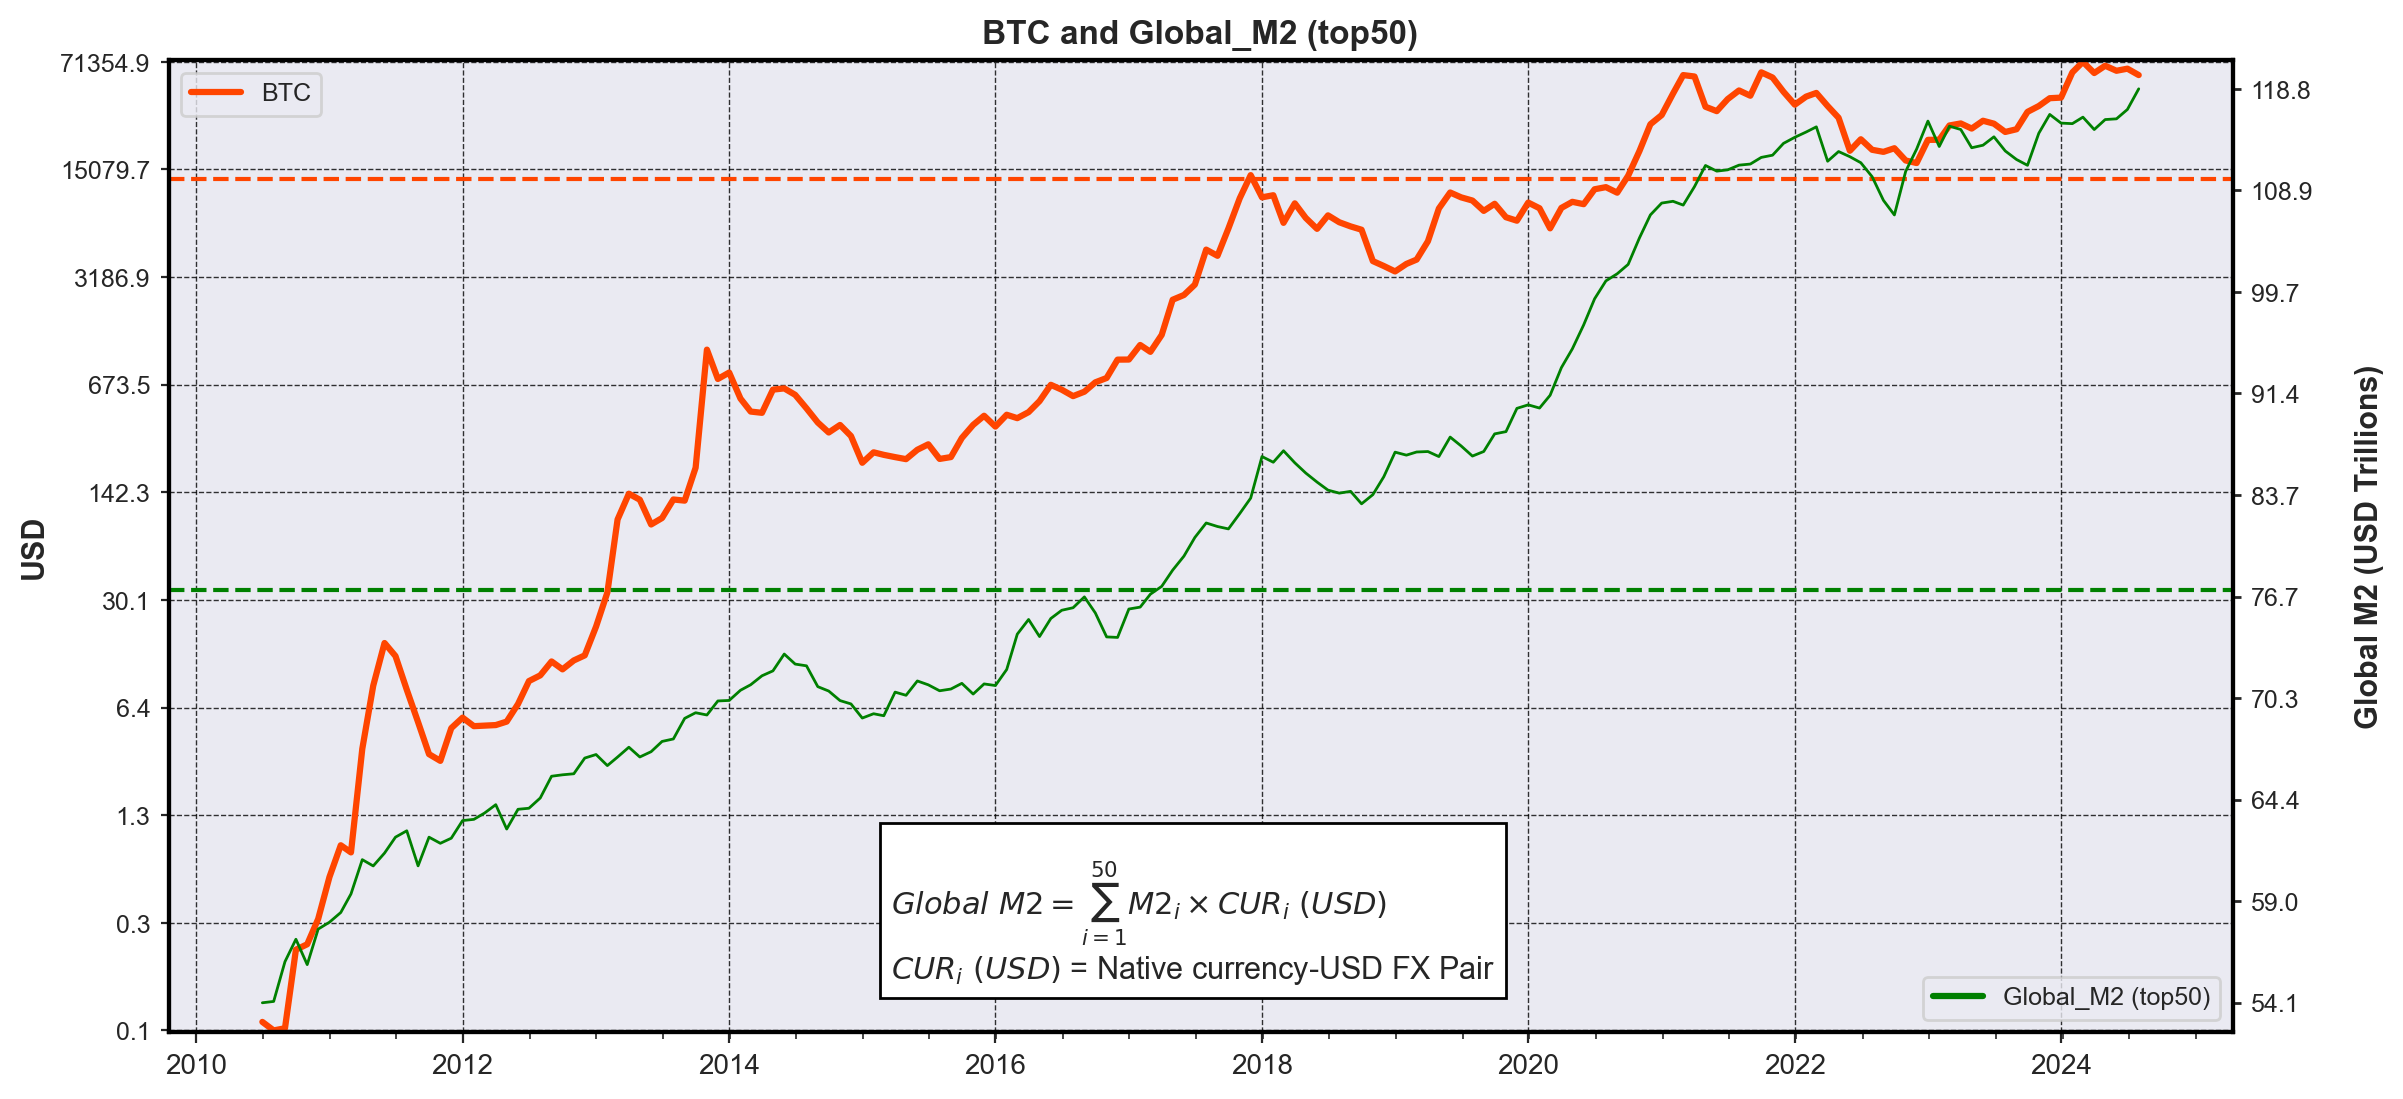

In [173]:
%matplotlib inline
c1 = "orangered"; c2 = "green"  # c1 and c2 are the colors to use for series 1 and 2.
fig, ax = pair1.plot_series(color1=c1, color2=c2)   # this is my plot_series method.
ax.axhline(ass1.mean(), lw = 1.5, ls = "--", c = c1)  # Add horizontal lien for the mean. Comment out to remove the mean line.
axb = fig.axes[1]; axb.grid(False)
axb.axhline(ass2.mean(), lw = 1.5, ls = "--", c = c2)
axb.get_lines()[0].set_linewidth(1)
axb.set_ylabel("Global M2 (USD Trillions)")
ax.minorticks_on()
ax.text(0.35, 0.055, r"$ Global\ M2 = \sum_{i=1}^{50} M2_i \times CUR_{i}\ (USD) $"+"\n"+r"$CUR_{i}\ (USD)$ = Native currency-USD FX Pair", transform = ax.transAxes, fontsize = 11,
        bbox=dict(facecolor='white', alpha=1, edgecolor='black'))

### Optional deviation from the mean figure.
- Uses a plot template from my Charting module.
- SHows the deviation from the mean for each asset.

In [27]:
# pair1.data[pair1.ser1_title+"-meanDev"] = pair1.data[pair1.ser1_title] - pair1.data[pair1.ser1_title].mean()
# pair1.data[pair1.ser2_title+"-meanDev"] = pair1.data[pair1.ser2_title] - pair1.data[pair1.ser2_title].mean()
# MacroBackend.Charting.gen_subplots_bar(pair1.data[pair1.ser1_title+"-meanDev"], pair1.data[pair1.ser2_title+"-meanDev"], color1=c1, color2=c2, title = "Deviation from mean")

## Plot Log Returns

Plot width:  2170.0 bar width:  13.734177215189874


(<Figure size 2800x1200 with 2 Axes>,
 array([<Axes: title={'center': 'YoY Log Returns: BTC vs Global_M2 (top50)'}, ylabel='Log Returns'>,
        <Axes: ylabel='Log Returns'>], dtype=object))

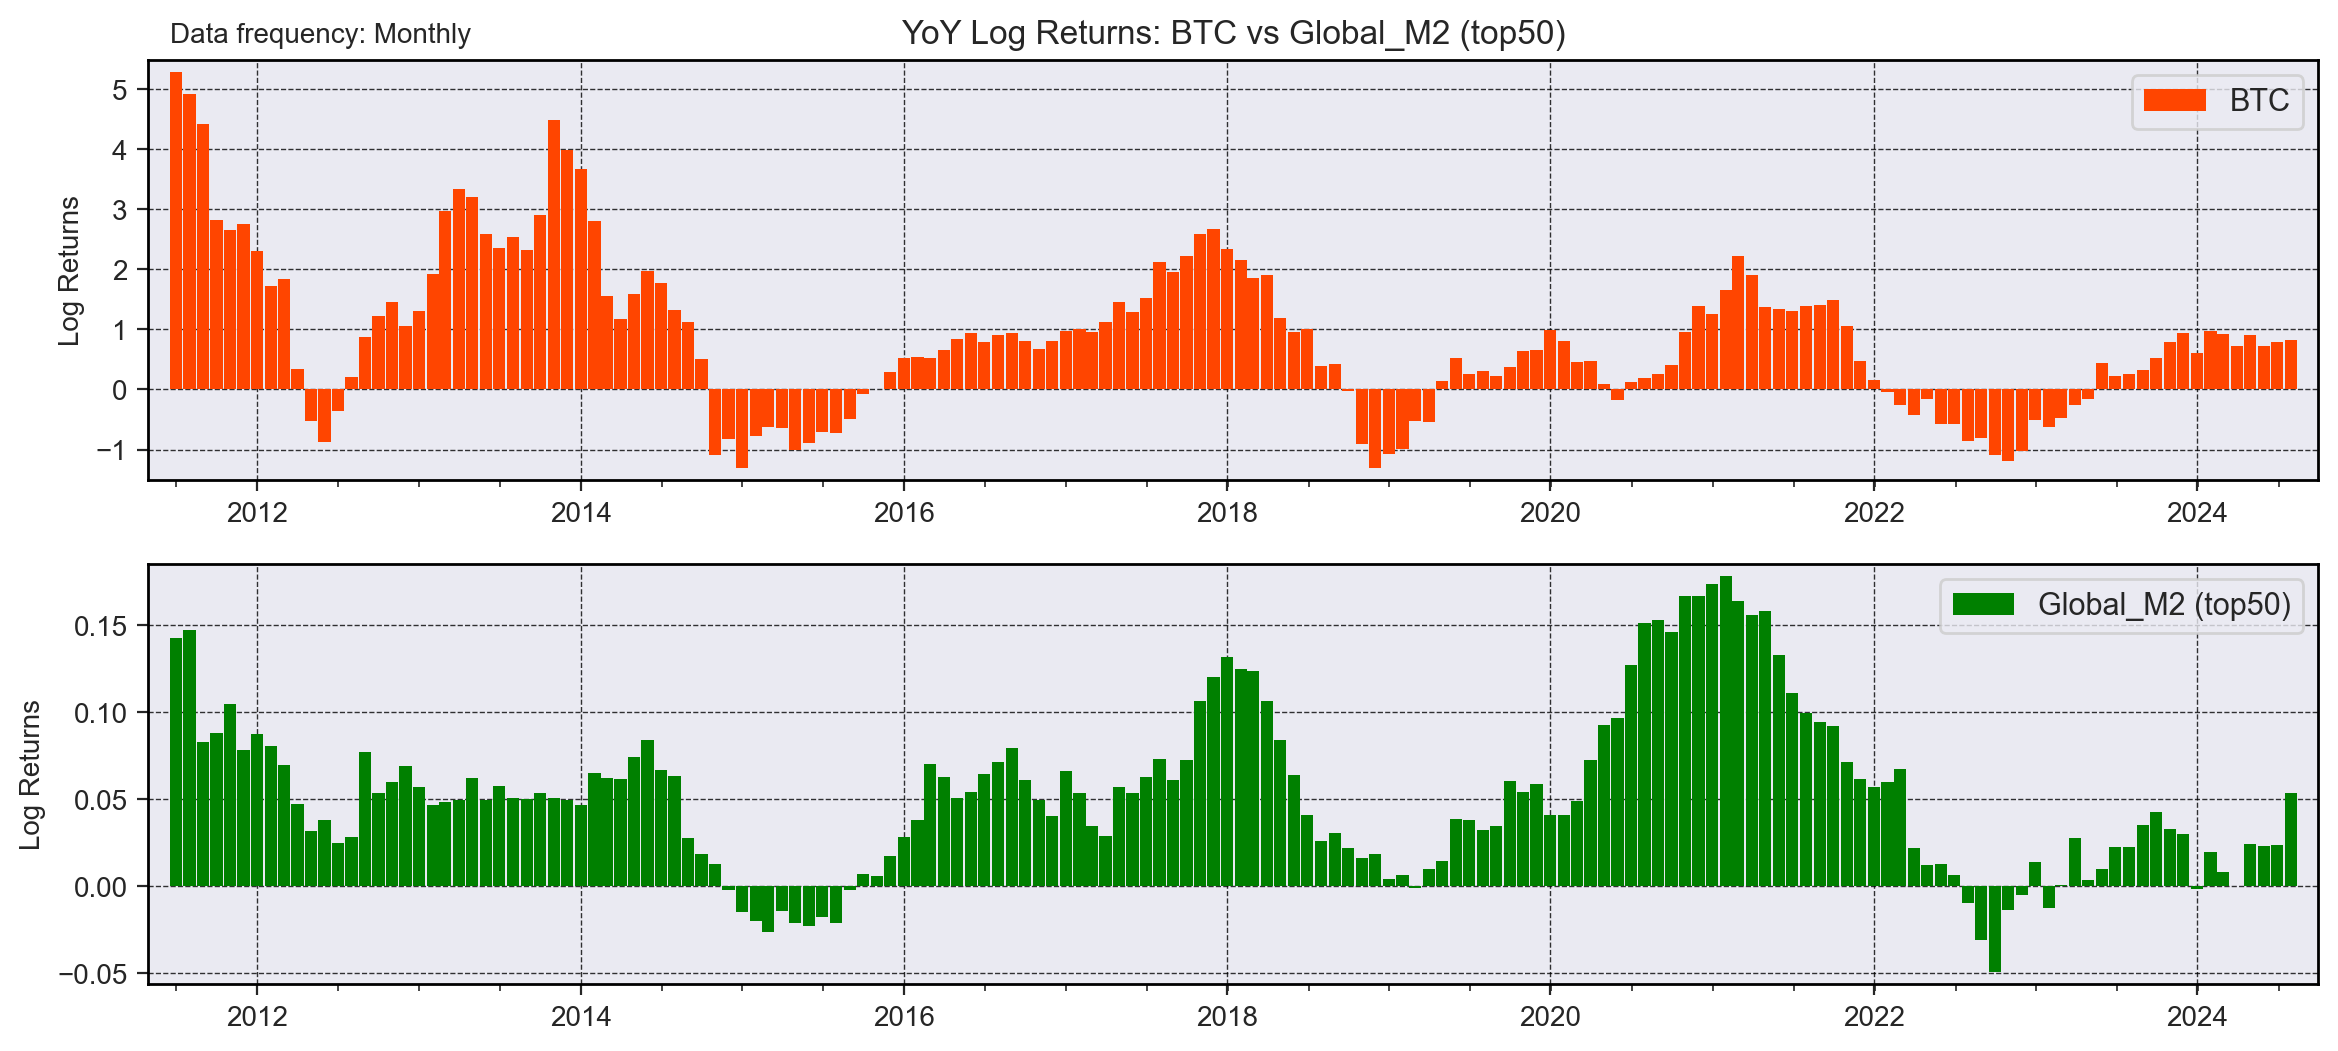

In [174]:
pair1.plot_log_returns_alt(color1=c1, color2=c2, YoY=True)  # You can downsample further, just for this figure, won't affect the self.data DataFrame.

### My modfied scatter matrix plot with the kde peak line

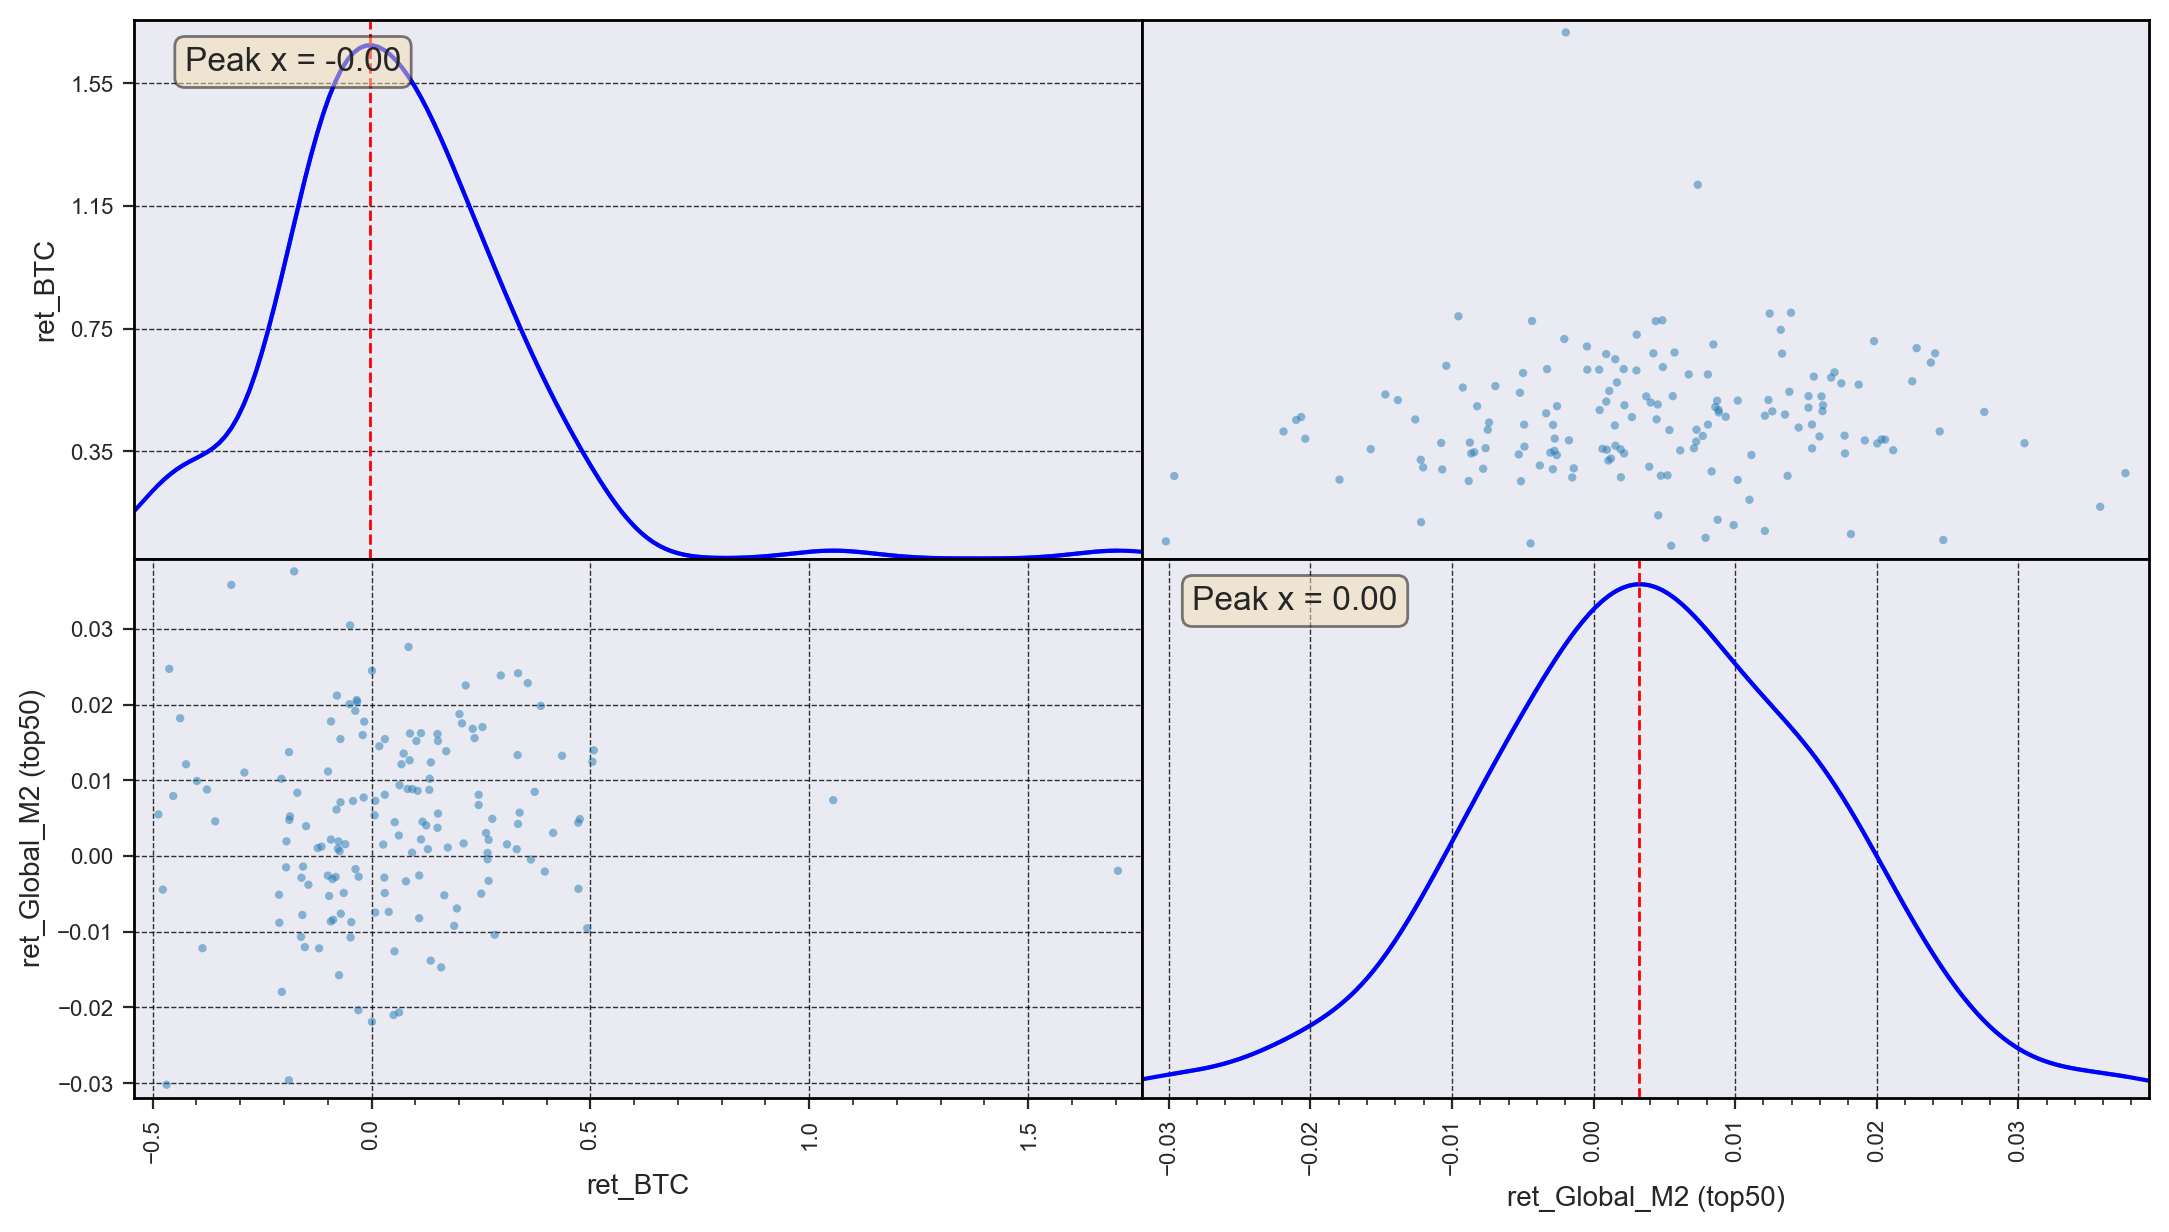

In [175]:
scatMat = pair1.bm_scatterMatrix()

### Linear regression with trendline shown and $R^2$ value printed.

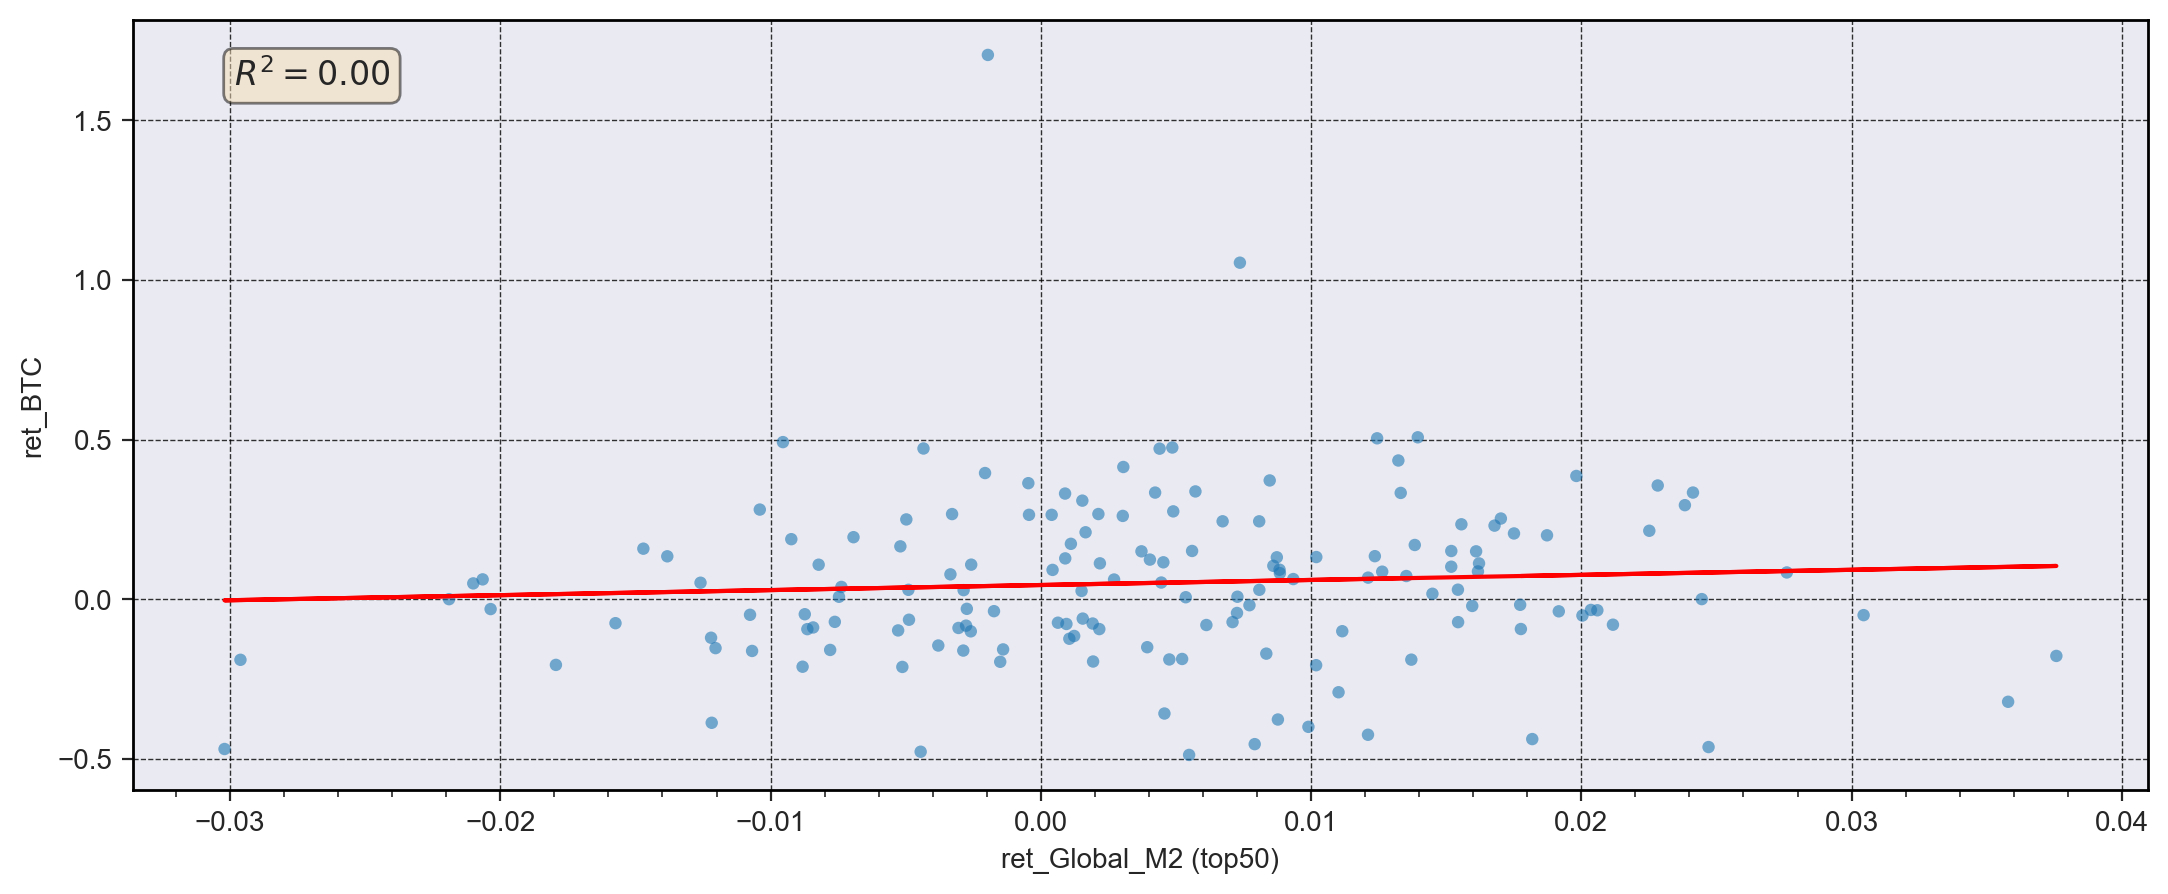

In [176]:
pair1.plot_lin_reg()

## Plot the rolling Pearson Corrlelation traces.
- You have the option to plot 1 - 4 subplots, using different means to calculate the correlation. 
- plot_wrong_way: bool = True - plot the correlation traces calculated using the actual series values (this is wrong).
- percentage_ret_corr: bool = False, plot the rolling PCC calculated using percentage returns rather than log returns.
- qd_corr: bool = False, plot the PCC traces done using a modified PCC formula by QuantDare.

Frequency of the pair:  Monthly


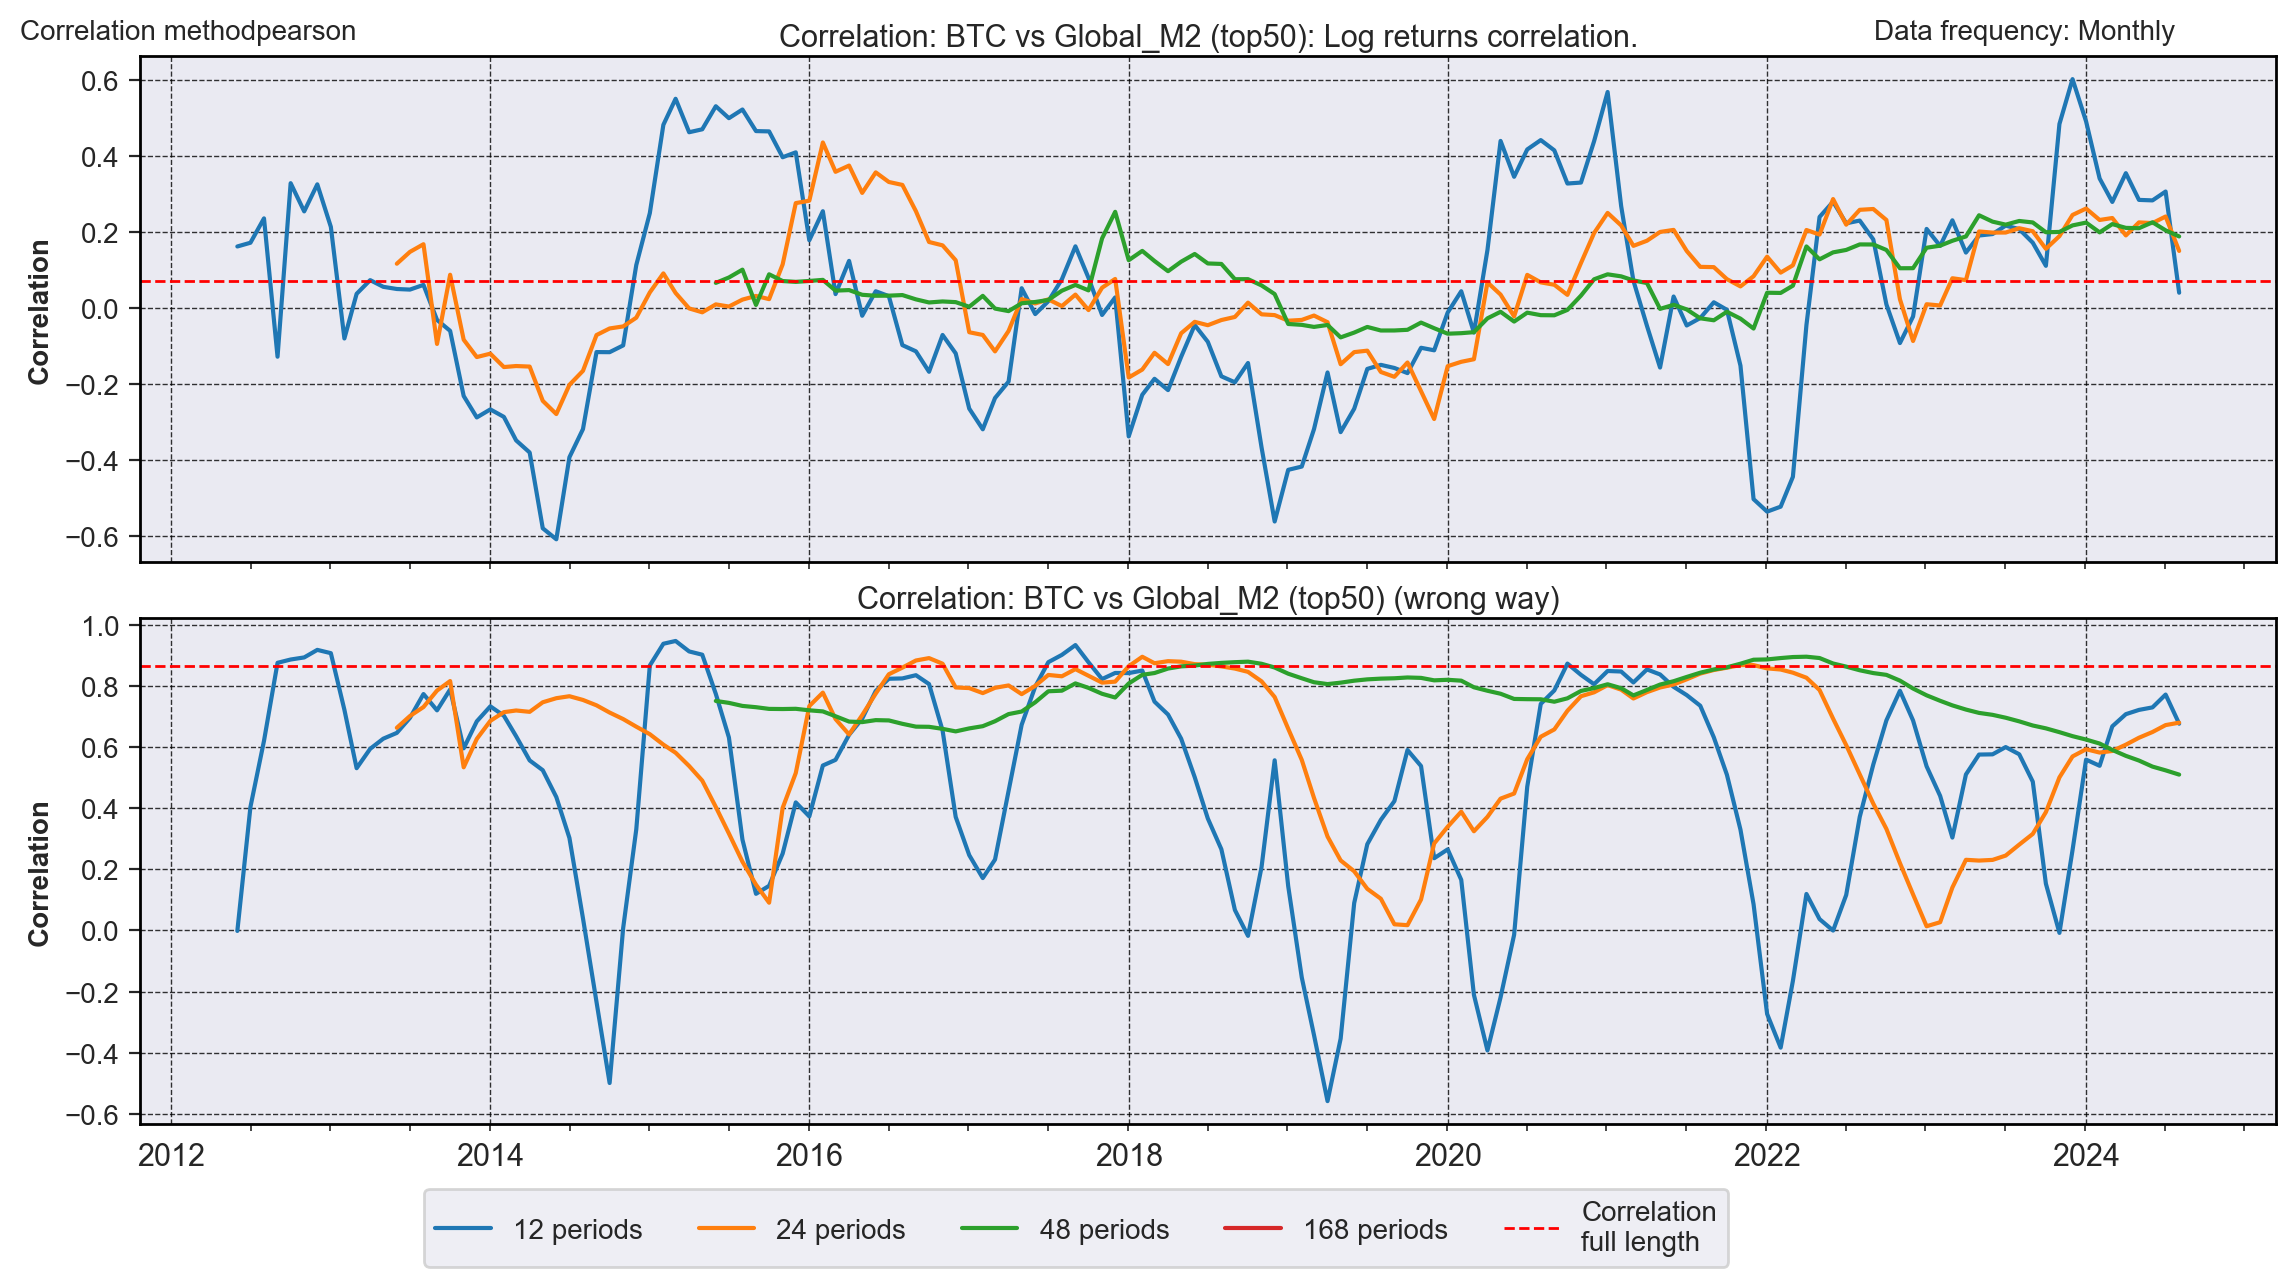

In [177]:
pair1.plot_corrs()

## Cross - correlation analysis
Move around one of the data series, shifted +/- n number of periods. Calculate correlation at each shift.

Optimal lag: -1 Highest correlation: 0.14902884999765229


(-1, 0.14902884999765229)

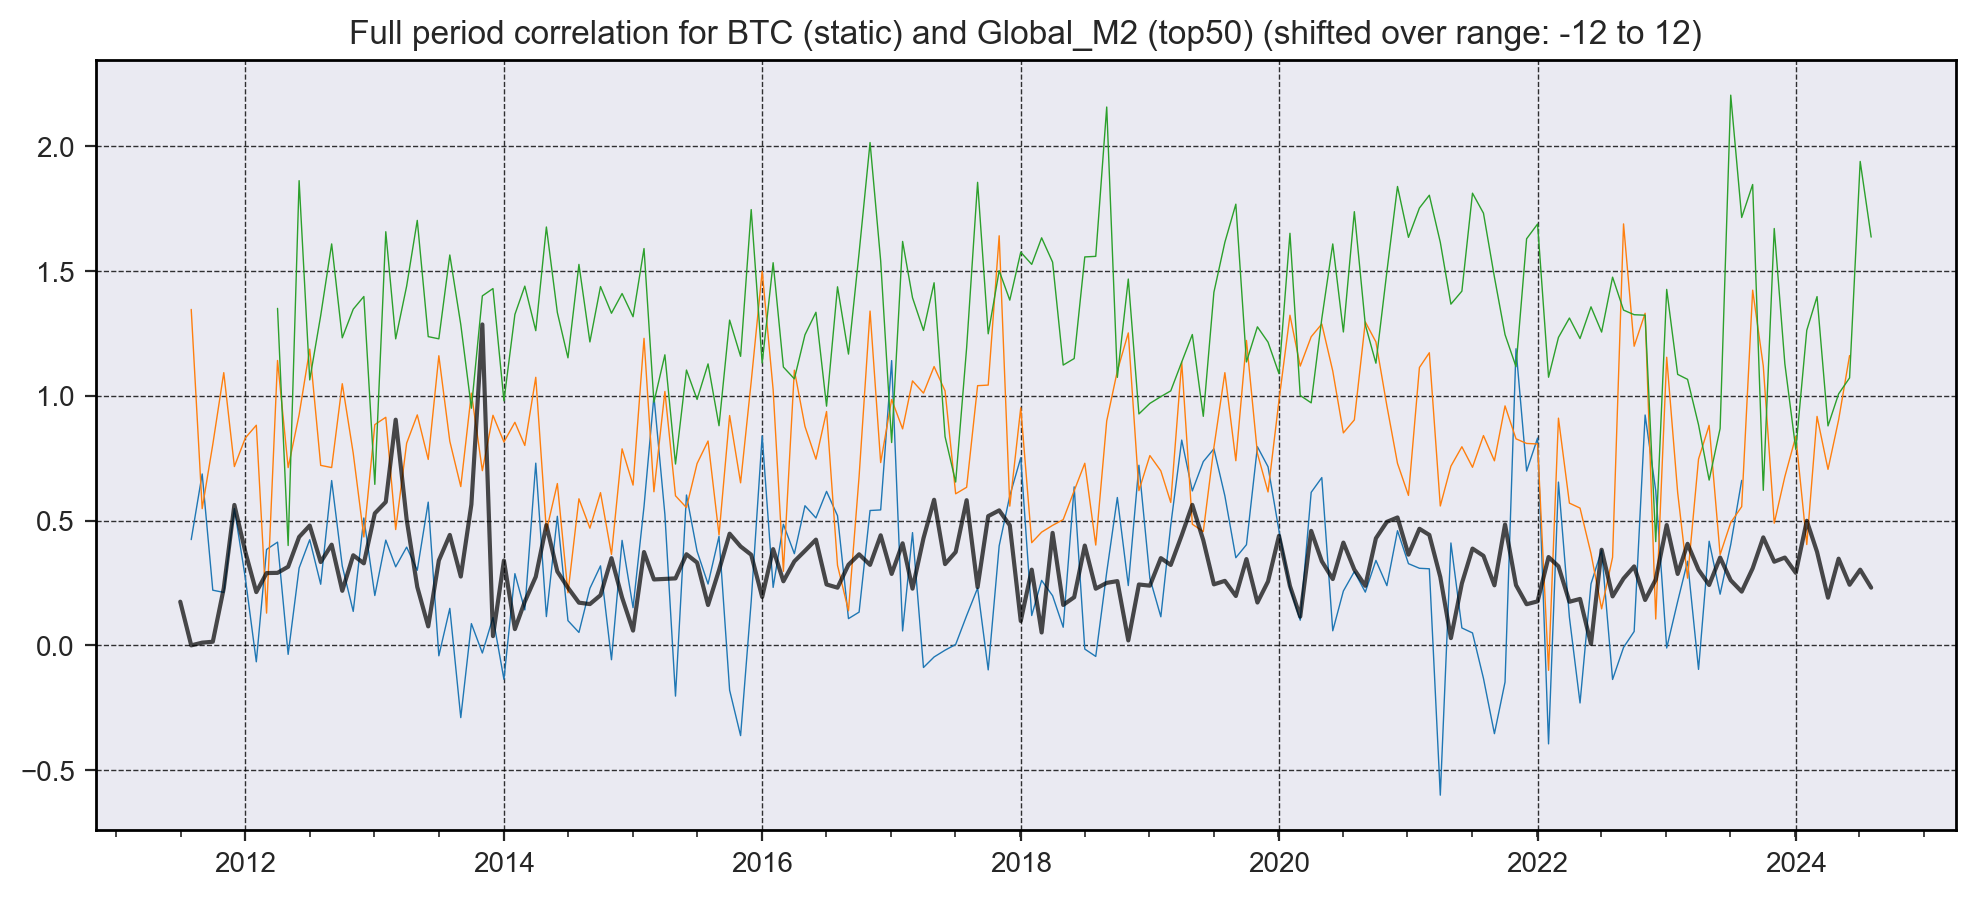

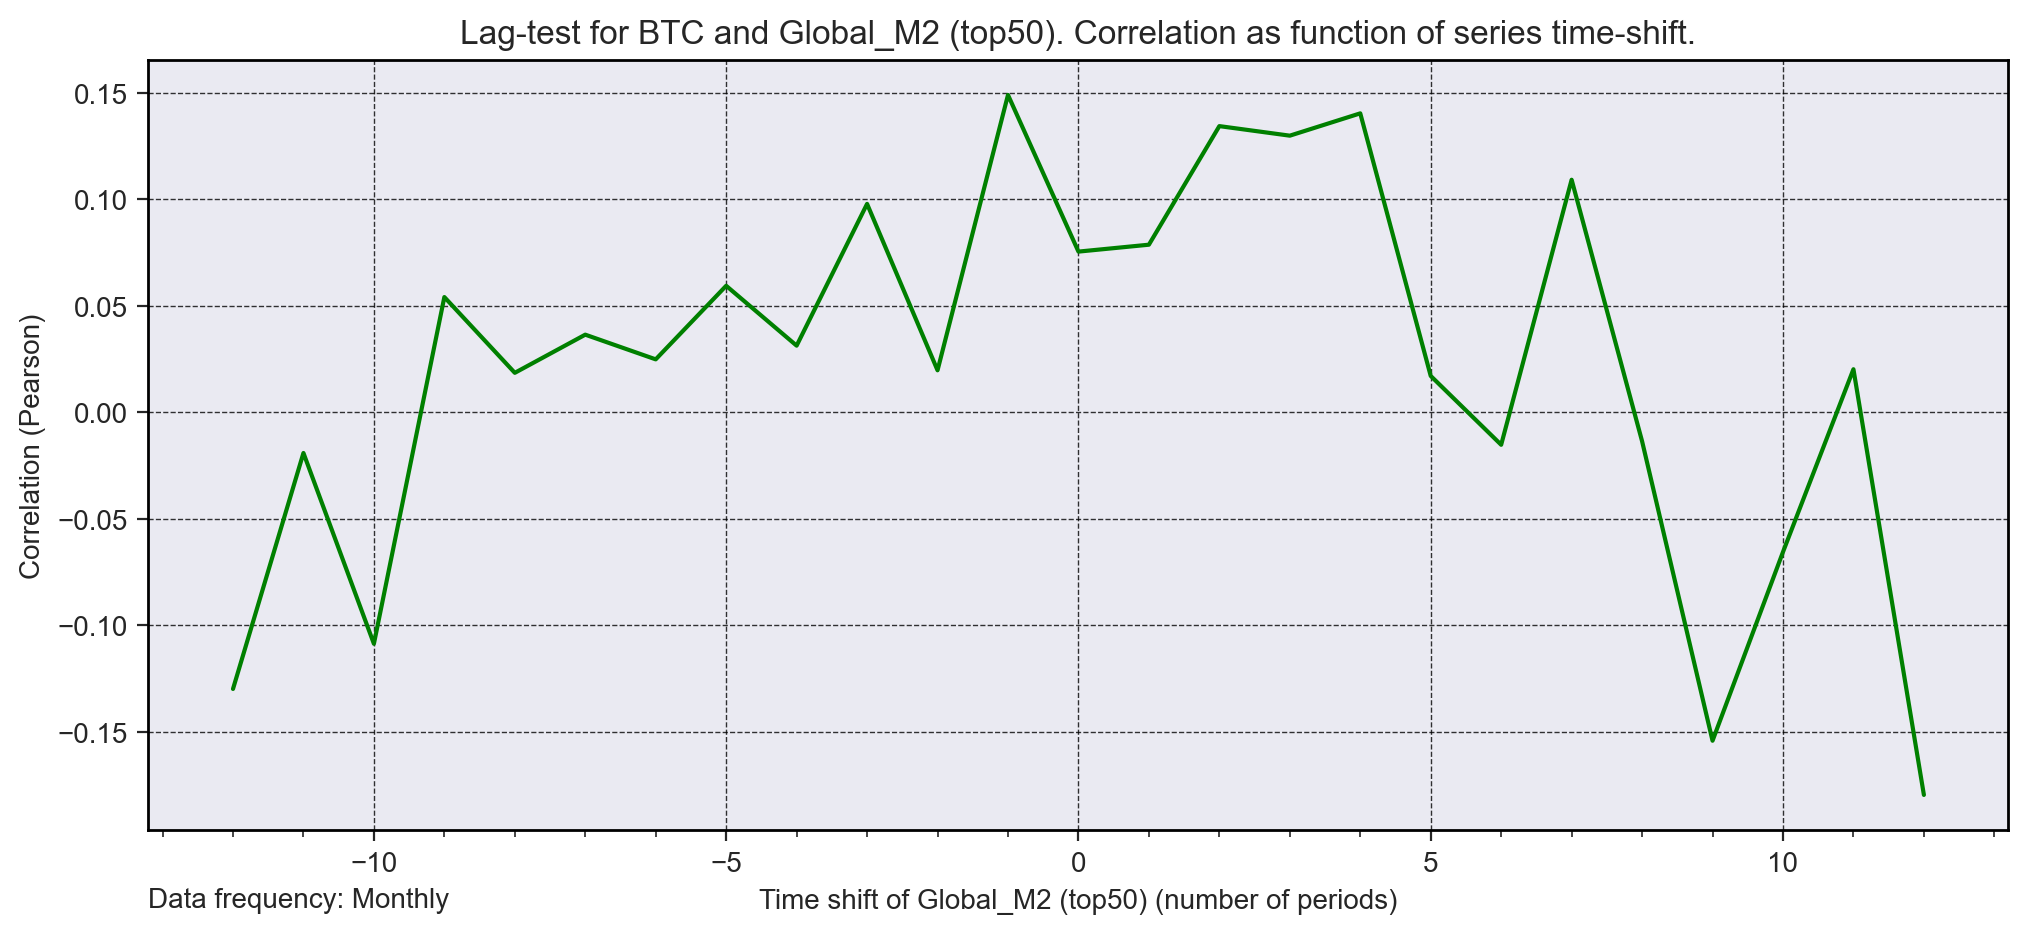

In [178]:
pair1.find_optimal_ret_lag(12)

### Export your plots..

In [55]:
pair1.export_plots(savePath = "/Users/jamesbishop/Documents/Financial/Investment/MACRO_STUDIES/TwitterThreadz/BTC_Liquidities/assets", dialog="Qt", format = "png")

/Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/Utilities.py:1457: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig1.savefig(savePath + fdel + savename + '_series.' + format, **save_options)


Saved figure 1 to:  /Users/jamesbishop/Documents/Financial/Investment/MACRO_STUDIES/TwitterThreadz/BTC_Liquidities/assets/BTC-Global_M2_(top50)_series.png
Saved returns_plot to:  /Users/jamesbishop/Documents/Financial/Investment/MACRO_STUDIES/TwitterThreadz/BTC_Liquidities/assets/BTC-Global_M2_(top50)_ret.png
Saved linear regression scatter plot to:  /Users/jamesbishop/Documents/Financial/Investment/MACRO_STUDIES/TwitterThreadz/BTC_Liquidities/assets/BTC-Global_M2_(top50)_reg.png
Saved correlation plot figure to:  /Users/jamesbishop/Documents/Financial/Investment/MACRO_STUDIES/TwitterThreadz/BTC_Liquidities/assets/BTC-Global_M2_(top50)_corr.png
Saved scatter matrix plot figure to:  /Users/jamesbishop/Documents/Financial/Investment/MACRO_STUDIES/TwitterThreadz/BTC_Liquidities/assets/BTC-Global_M2_(top50)_scatMat.png
Saved lag plot figure to:  /Users/jamesbishop/Documents/Financial/Investment/MACRO_STUDIES/TwitterThreadz/BTC_Liquidities/assets/BTC-Global_M2_(top50)_lag.png
Saved lag plot

In [2]:
gm2_shifted = gm2.shift(-1).dropna() / 10**12
pair2 = MacroBackend.Utilities.Pair_stats(ass1, gm2_shifted, windows = [12, 24, 48], ser1_title="Bitcoin", ser2_title="Global M2 (-1 month back)", corr_method='pearson', watchlist_meta=watchlist["metadata"])
pair2.plot_series()

NameError: name 'gm2' is not defined

Frequency of the pair:  Monthly


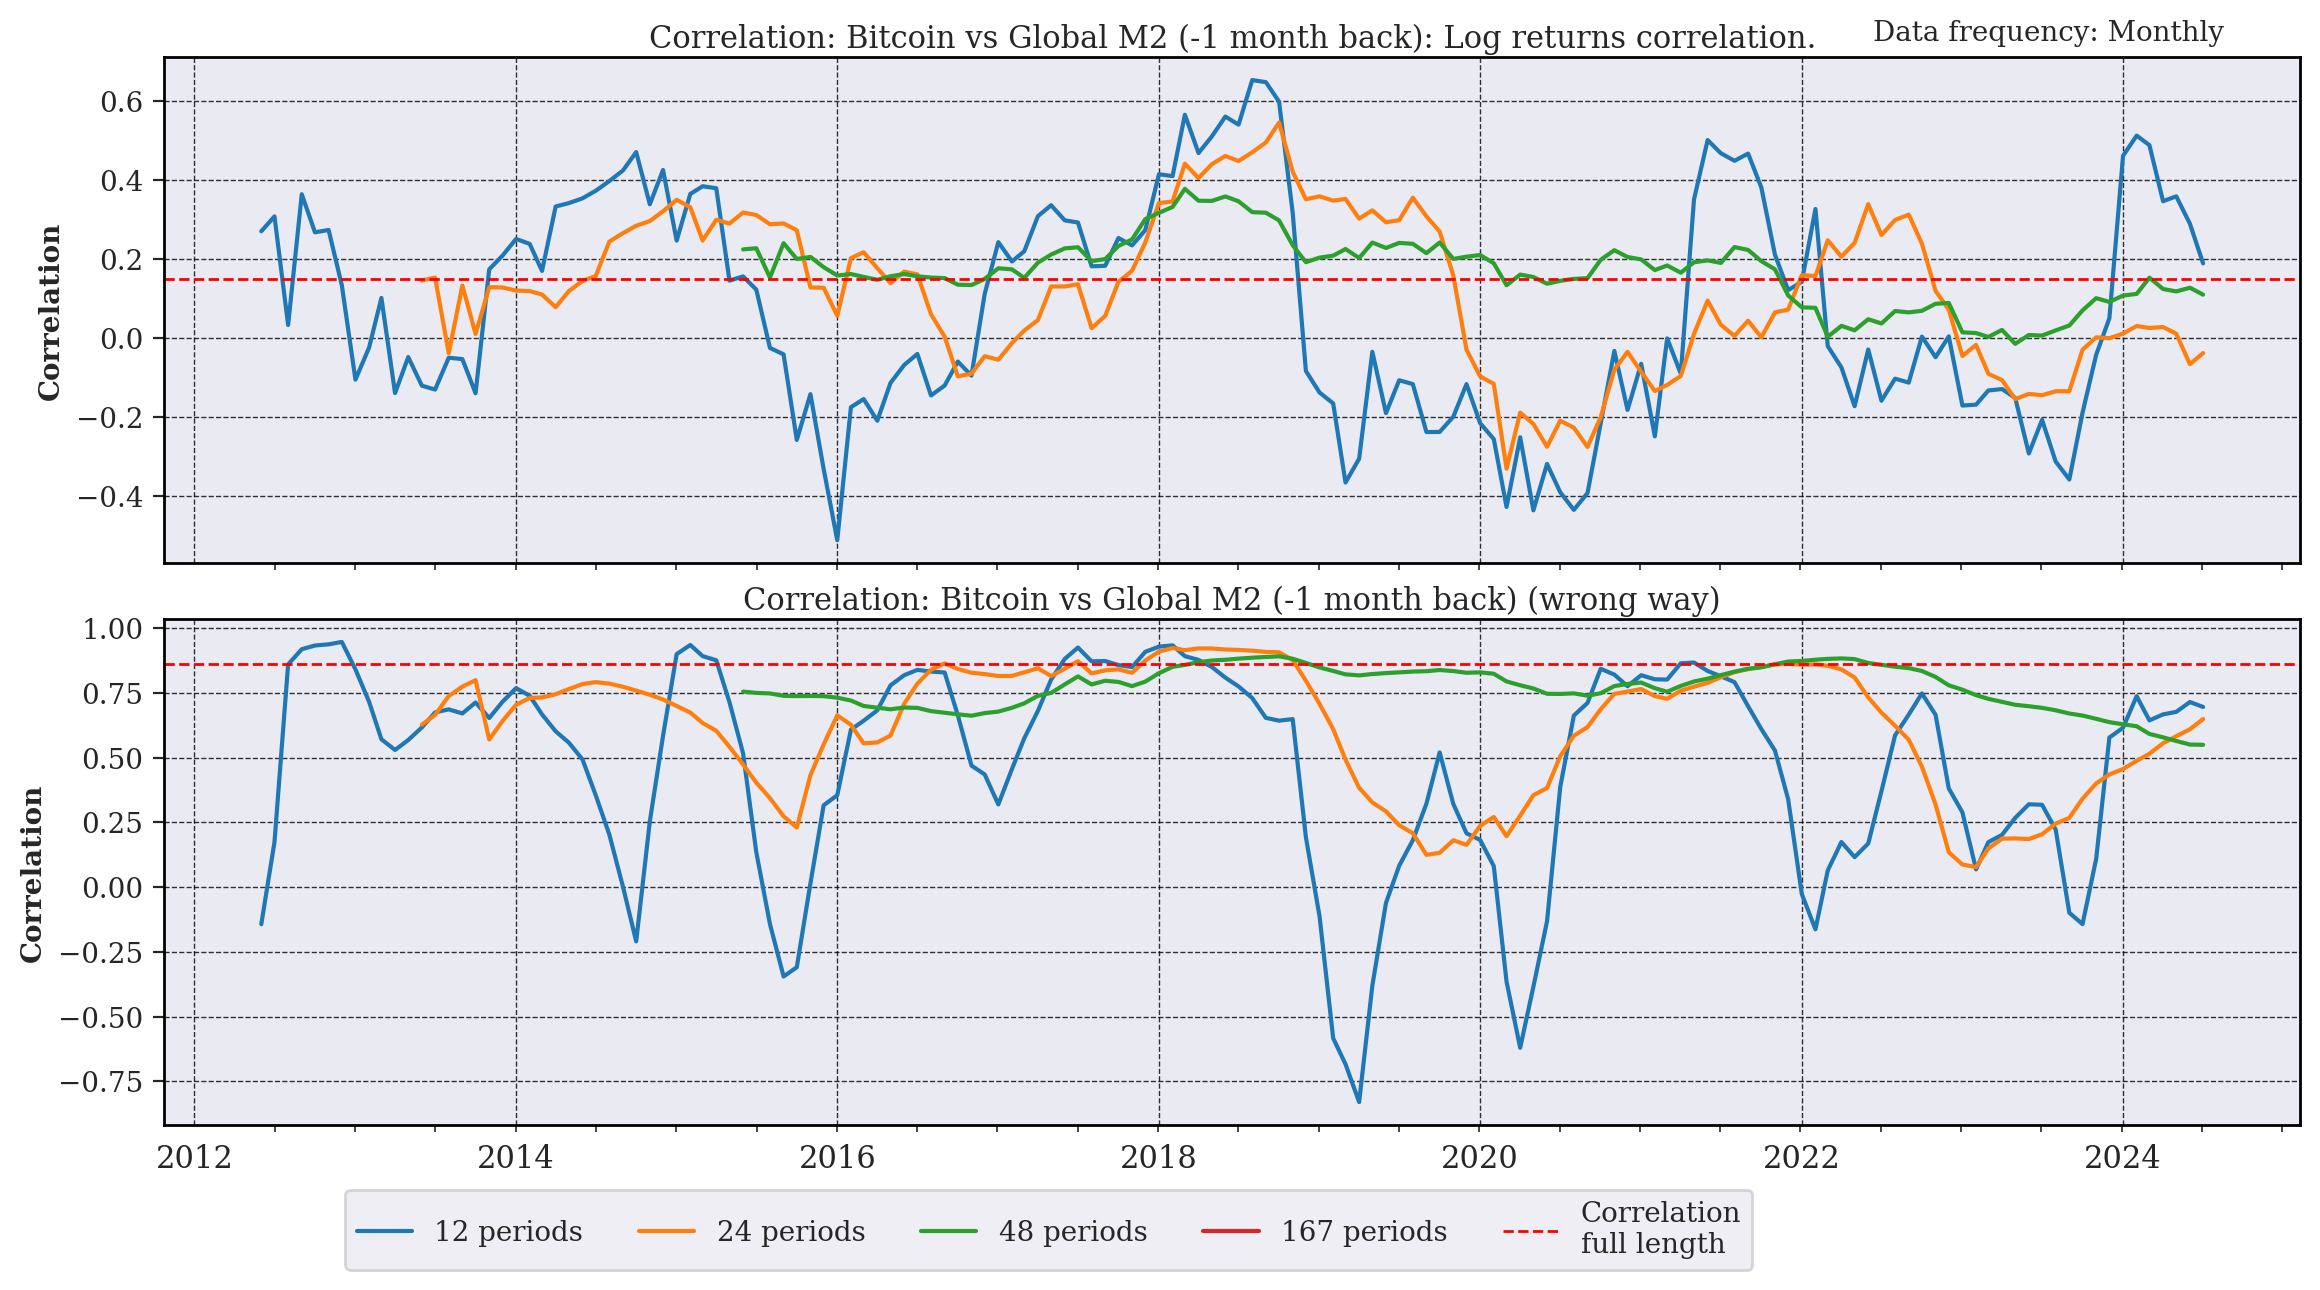

In [64]:
pair2.plot_corrs()

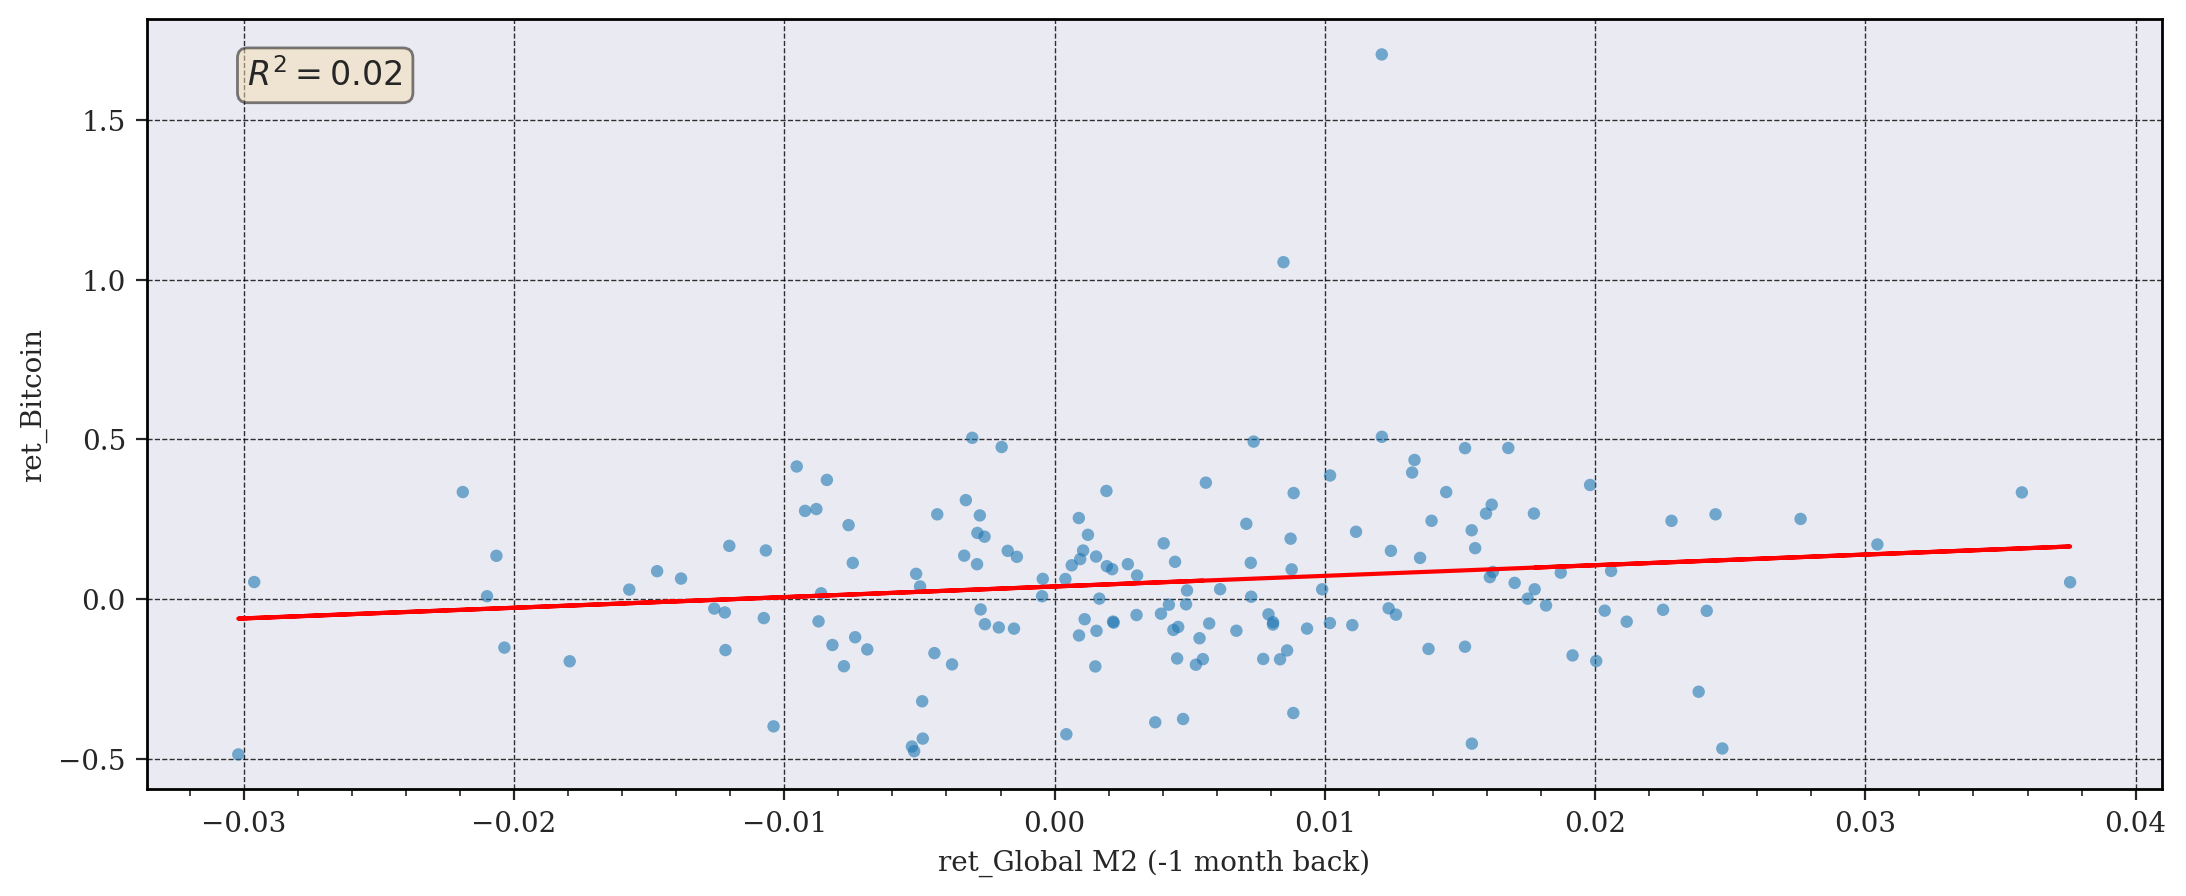

In [65]:
pair2.plot_lin_reg()

In [68]:
pair2.assess_correlation_error(returns = False)

{'correlation_coefficient': 0.8617152733698925,
 'p_value_non_corr': 1.5777403619232074e-47,
 'standard_error': 0.040754717727387604,
 'normality_tests': {'Bitcoin': ShapiroResult(statistic=0.7428094347160124, pvalue=2.8061842780561716e-15),
  'Global M2 (-1 month back)': ShapiroResult(statistic=0.8813906608767197, pvalue=7.085412103189478e-10)},
 'stationarity_tests': {'Bitcoin': (-0.12797312639568081,
   0.9465800361895602,
   2,
   154,
   {'1%': -3.473542528196209,
    '5%': -2.880497674144038,
    '10%': -2.576878053634677},
   2787.4833342099537),
  'Global M2 (-1 month back)': (0.15194821860556093,
   0.9694340199514374,
   1,
   155,
   {'1%': -3.4732590518613002,
    '5%': -2.880374082105334,
    '10%': -2.5768120811654525},
   437.95534479555255)}}

In [77]:
pair3 = MacroBackend.Utilities.Pair_stats(ass1, ass2, windows=[12, 24, 48], ser1_title="BTC", ser2_title="Global_M2 (top50)", corr_method='spearman', watchlist_meta=watchlist["metadata"])

TypeError: 'NoneType' object is not subscriptable

Frequency of the pair:  Monthly


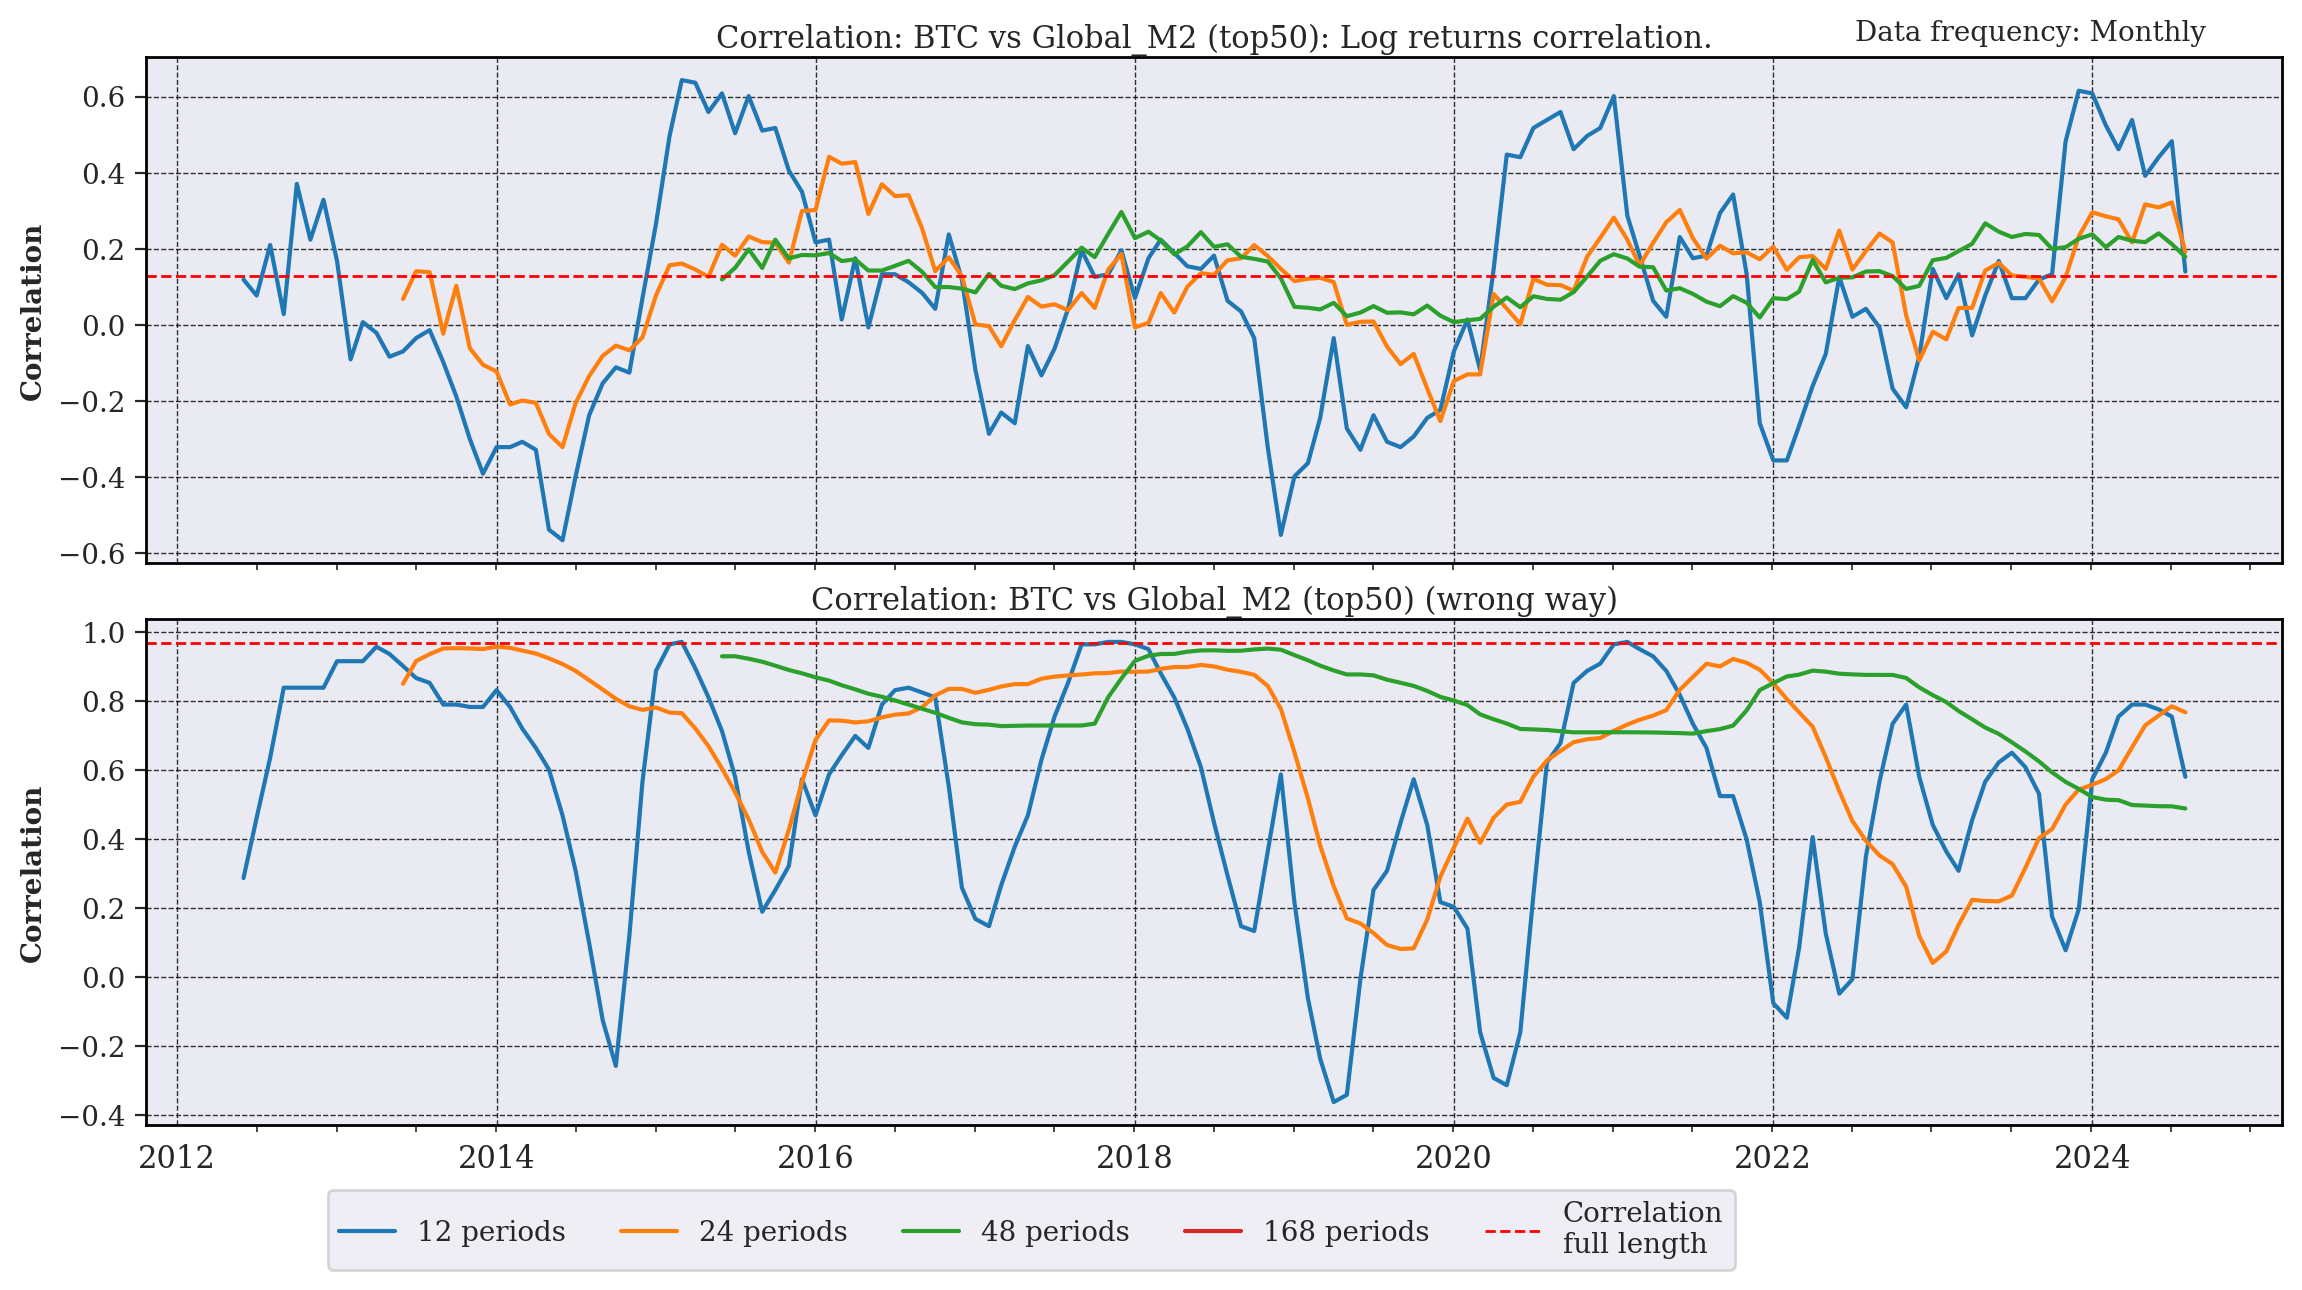

In [73]:
pair3.plot_corrs()

Optimal lag: 3 Highest correlation: 0.20604582008756583


(3, 0.20604582008756583)

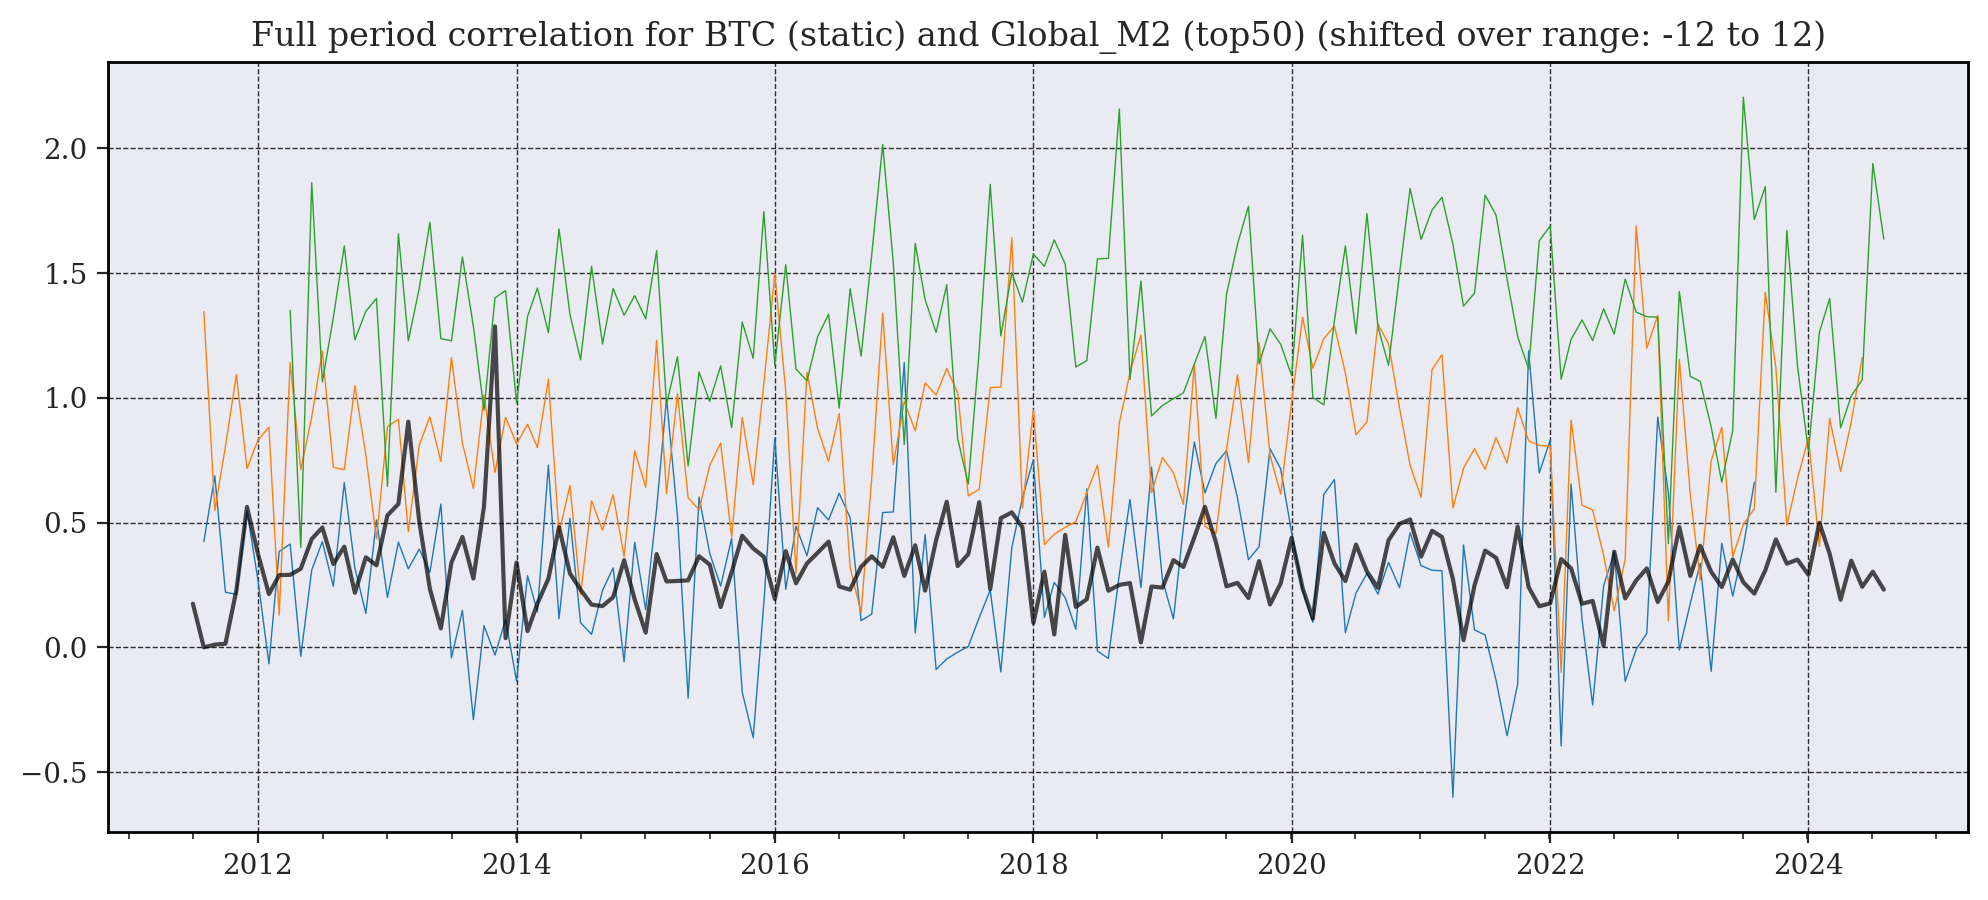

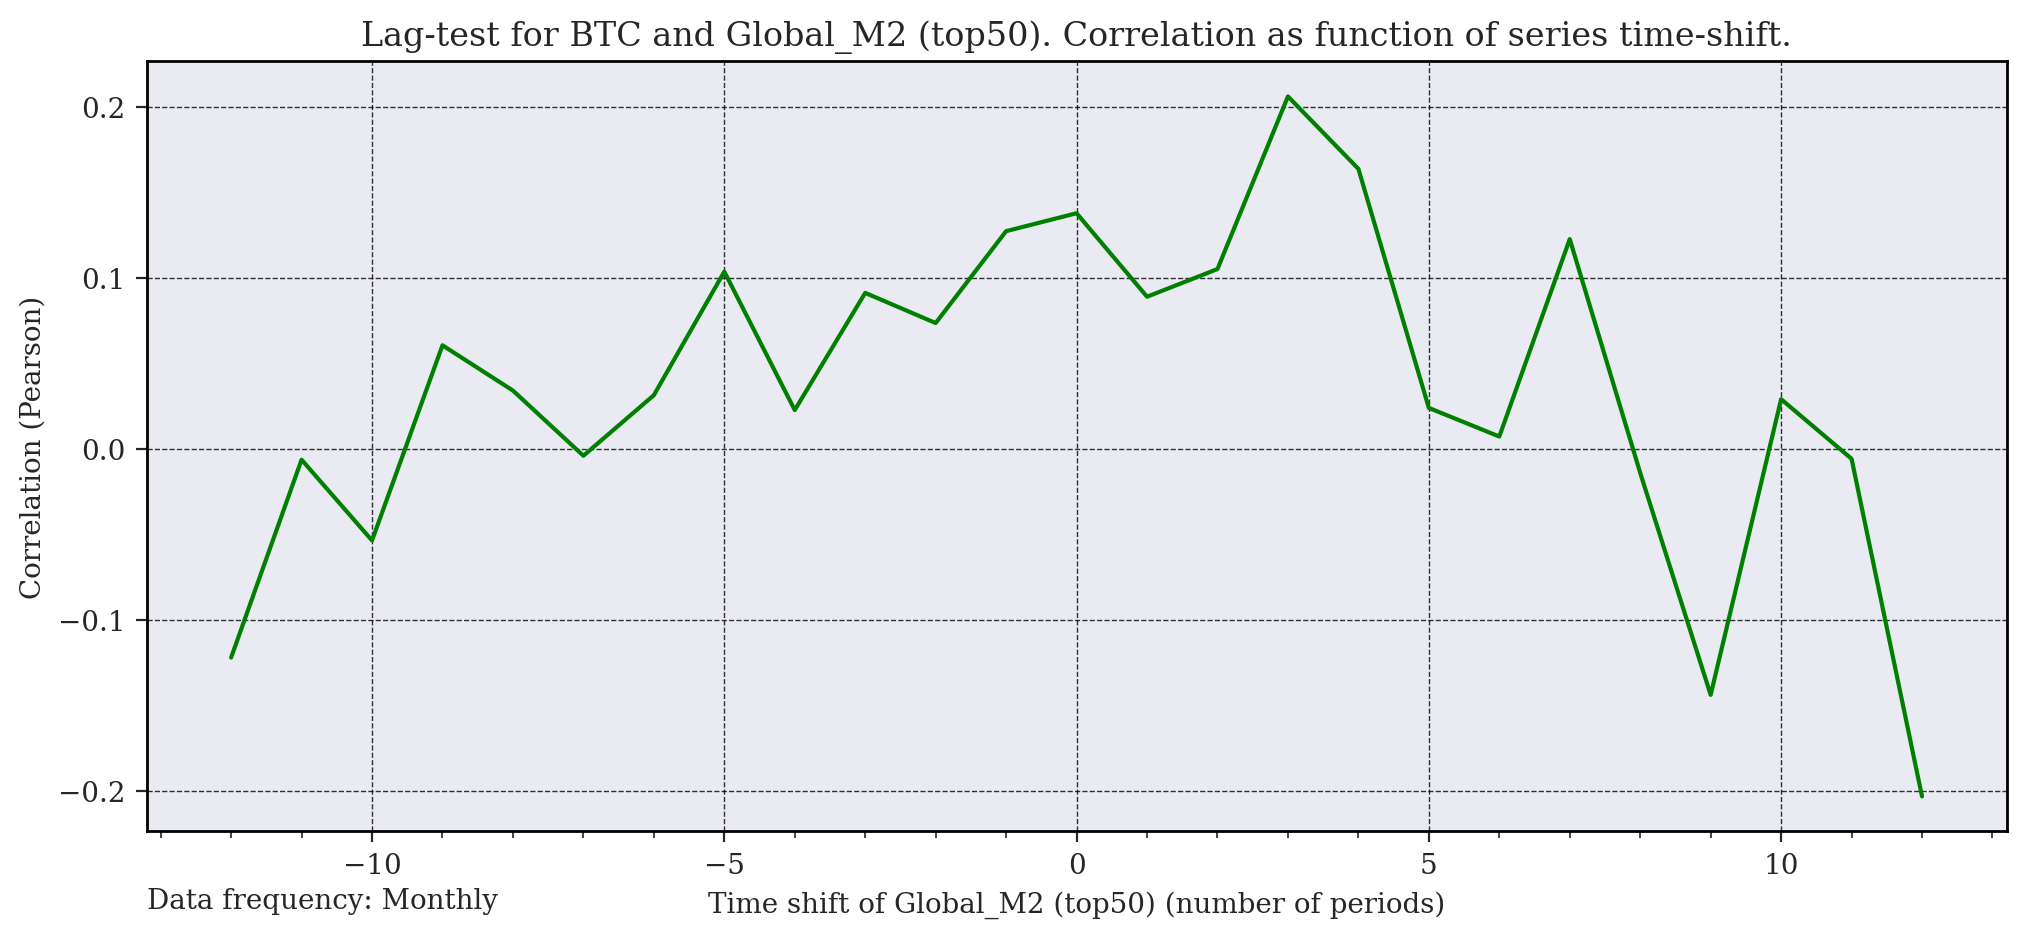

In [74]:
pair3.find_optimal_ret_lag(12)